# Marketing Data Analysis: business approach


## Objectives

**Main objective** - create a classification model to predict marketing campaigns responses

**Minor objectives:**
- conduct an exploratory data analysis
- evaluate the marketing campaigns
- identify spending patterns
- provide the store with recommendations about future campaigns

***extra:*** check if clustering is aplicable to conduct clients' segmentation

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif
from sklearn.cluster import Birch, KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, precision_recall_curve,\
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
import catboost as cb
from catboost import CatBoostClassifier
import shap
from itertools import combinations
import warnings

In [2]:
df = pd.read_csv('ifood_df.csv')

In [3]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Getting familiar with the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
df.shape

(2205, 39)

In [6]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


## Data Adjustments

Before starting the analysis, it is necessary to adjust and delete some columns.\
A new column named 'Dependants' will be created as the sum of the 'Kidhome' and 'Teenhome' columns.\
Two additional columns, 'marital_incouple' and 'marital_alone', will be created based on several columns related to marital status.

In [8]:
df['Dependants'] = df['Kidhome']+df['Teenhome']
df['marital_incouple'] = df['marital_Married']+df['marital_Together']
df['marital_alone'] = df['marital_Divorced']+df['marital_Single']+df['marital_Widow']
df.drop(columns=['marital_Married','marital_Together','marital_Divorced','marital_Single','marital_Widow','Z_CostContact','Z_Revenue'], inplace=True)

## EDA

In [9]:
def basic_plots(df,x,plotkind,nrows,ncols,figsize):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()
    
    for i, kind in enumerate(x):
        if plotkind=='histogram':
            axes[i].hist(df[kind], edgecolor='black')
            axes[i].set_title(f'{kind} {plotkind}')
        elif plotkind=='boxplot':
            axes[i].boxplot(df[kind])
            axes[i].set_title(f'{kind} {plotkind}')
        elif plotkind=='piechart':
            if isinstance(kind,list):
                temp = df[kind].idxmax(axis=1).value_counts()
            else:
                temp = df[kind].value_counts()
            temp.plot(kind='pie', autopct=lambda p: '{:.0f}'.format(p * len(df[kind]) / 100),ax=axes[i])
    
        axes[i].set_xlabel(None)
        last_i = i
    
    t = nrows*ncols
    tt = t-(i+1)
    if tt <=1:
        for j in range(i+1,t,1):
            fig.delaxes(axes[j])
        
    plt.show() 

In [10]:
def add_plots(df,features,title,rotation,bins=None, bin_labels=None):
    results = []
    if len(features)==1:
        features = features[0]
        bins = pd.cut(df[features],bins,labels=bin_labels)
        temp = df
        temp['bins'] = bins
        results = temp.groupby('bins').agg({features: 'size','Response':sum})
        results['Response%'] = (results['Response']/results[features])*100
        
    else:
        for feature in features:
            temp=df[df[feature]==1]
            t = temp[temp['Response']==1].shape[0]
            result = {
                'Feature':feature,
                'Response%':(t/len(temp))*100
            }
            results.append(result)
        results = pd.DataFrame(results).set_index('Feature')
    
    plt.figure(figsize=(6,4))
    plt.bar(results.index.astype(str),results['Response%'], edgecolor='black')
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.ylabel('Responses in %')
    for i, v in enumerate(results['Response%']):
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)
    plt.show()

In [11]:
def sum_mean(df,x,nrows,ncols,figsize):
    last_i = 0
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.ravel()
    
    for i, var in enumerate(x):
        sums = {}
        means = {}
        medians = {}
        adjusted_i = i+last_i

        for v in var:
            sums.update({
                f'{v}':df[v].sum()
            })
            means.update({
                f'{v}':df[v].mean()
            })
            medians.update({
                f'{v}':df[v].median()
            })
        sums = pd.DataFrame(sums, index=['Total']).transpose().sort_values(by='Total')
        means = pd.DataFrame(means, index=['Means']).transpose().sort_values(by='Means')
        medians = pd.DataFrame(medians, index=['Medians']).transpose().sort_values(by='Medians')
        
        sums.plot(kind='pie', y='Total', autopct=lambda p: '{:.0f}'.format(p * sums['Total'].sum() / 100), textprops={'fontsize': 10},legend=False, ax=axes[adjusted_i])
        means.plot(kind='pie', y='Means', autopct=lambda p: '{:.0f}'.format(p * means['Means'].sum() / 100), textprops={'fontsize': 10},legend=False, ax=axes[adjusted_i+1])
        medians.plot(kind='pie', y='Medians', autopct=lambda p: '{:.0f}'.format(p * medians['Medians'].sum() / 100), textprops={'fontsize': 10},legend=False, ax=axes[adjusted_i+2])
        last_i = adjusted_i+2
        
    plt.show()

Some valuable insights from the EDA of the plots below:
- The analyzed store primarily caters to the middle class (or lower-middle based on the 2023 data)
- The largest number of purchases belongs to the group with approximately $\$$40,000 of annual income
- The store attracts middle-aged individuals, with the greatest number of purchases coming from the age group of 45 to 52 years
- The number of days indicating how long an individual has been a customer varies from 2,159 to 2,858 days. This suggests that there have been no new customers for almost 6 years. This fact may indicate that the store is likely located in a small town or that only long-term customers are concerned.
- More than 70% of customers have dependents, and over 60% are in a couple
- The df consists of educated individuals
- On average, customers tend to make purchases from the store approximately once every two months
- The mean value of spending is $\$$562; however, this is influenced by some outliers. Therefore, the median spending is $\$$343
- Wine is the top-selling product, followed by meat. These two items account for 77% of total sales
- 46% of purchases are made in-store, while 30% are made online

Histograms:


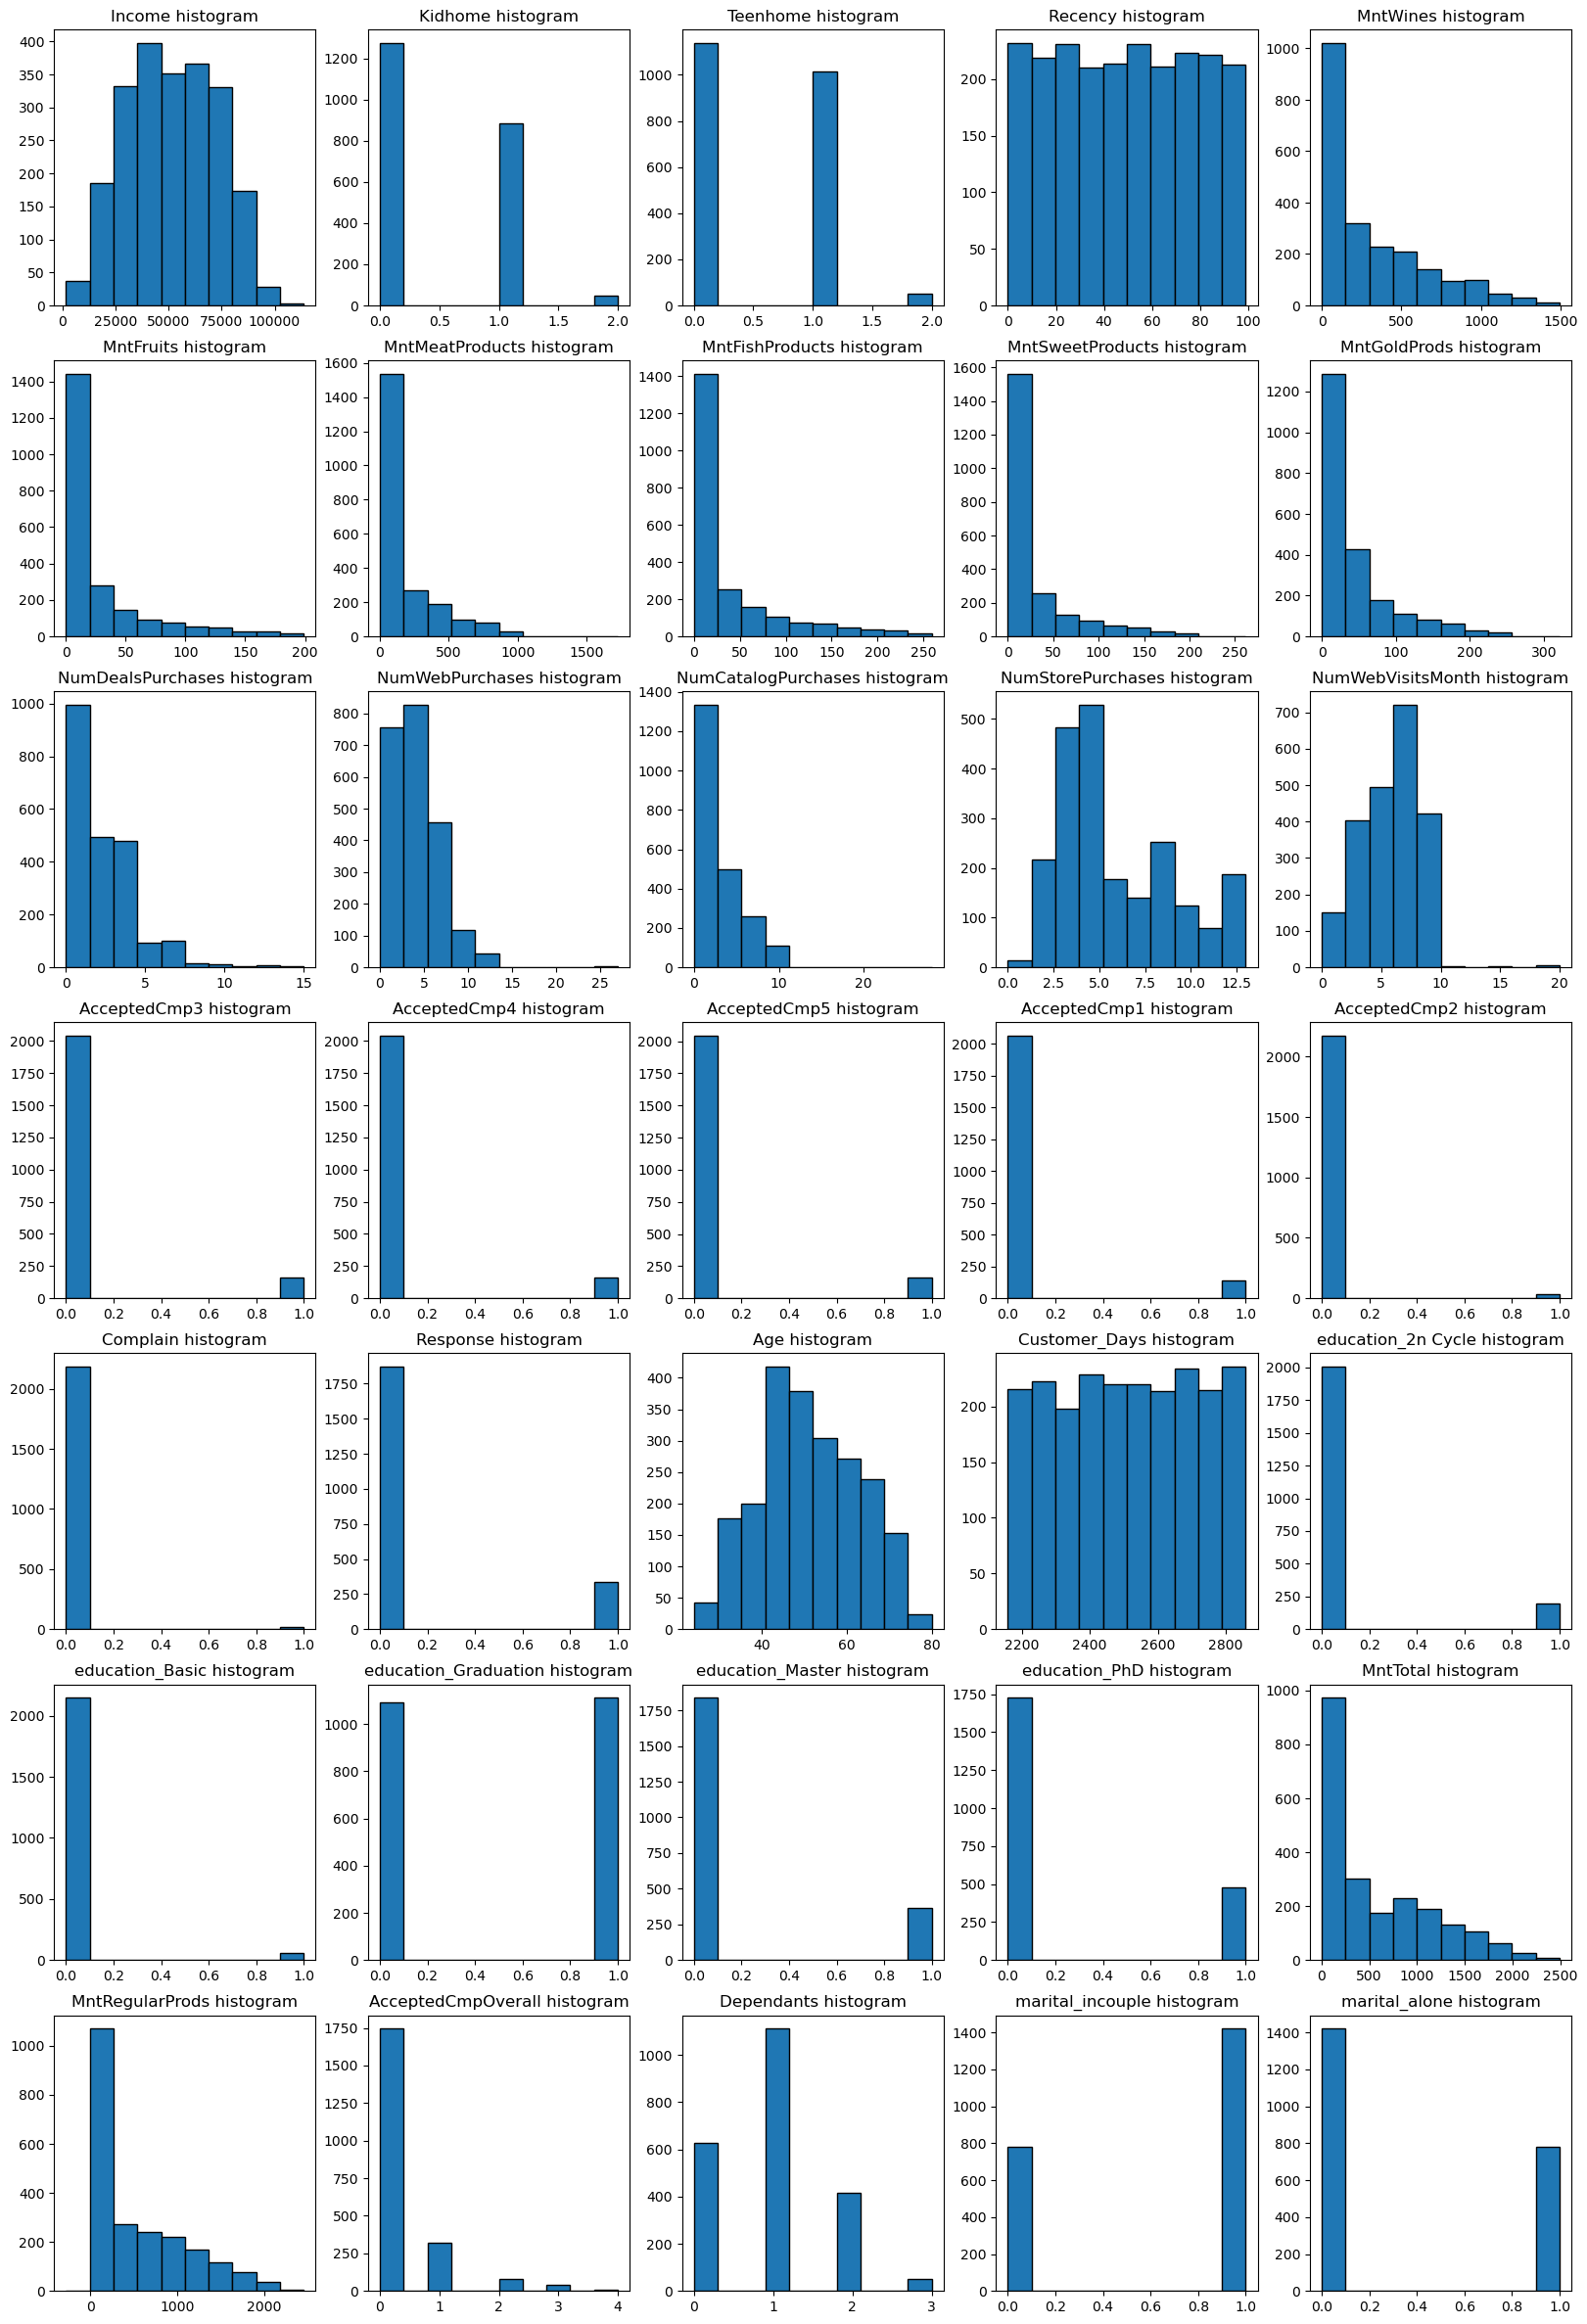

__________________________________________________________________________________________________________________________________________________________________________________
Boxplots:


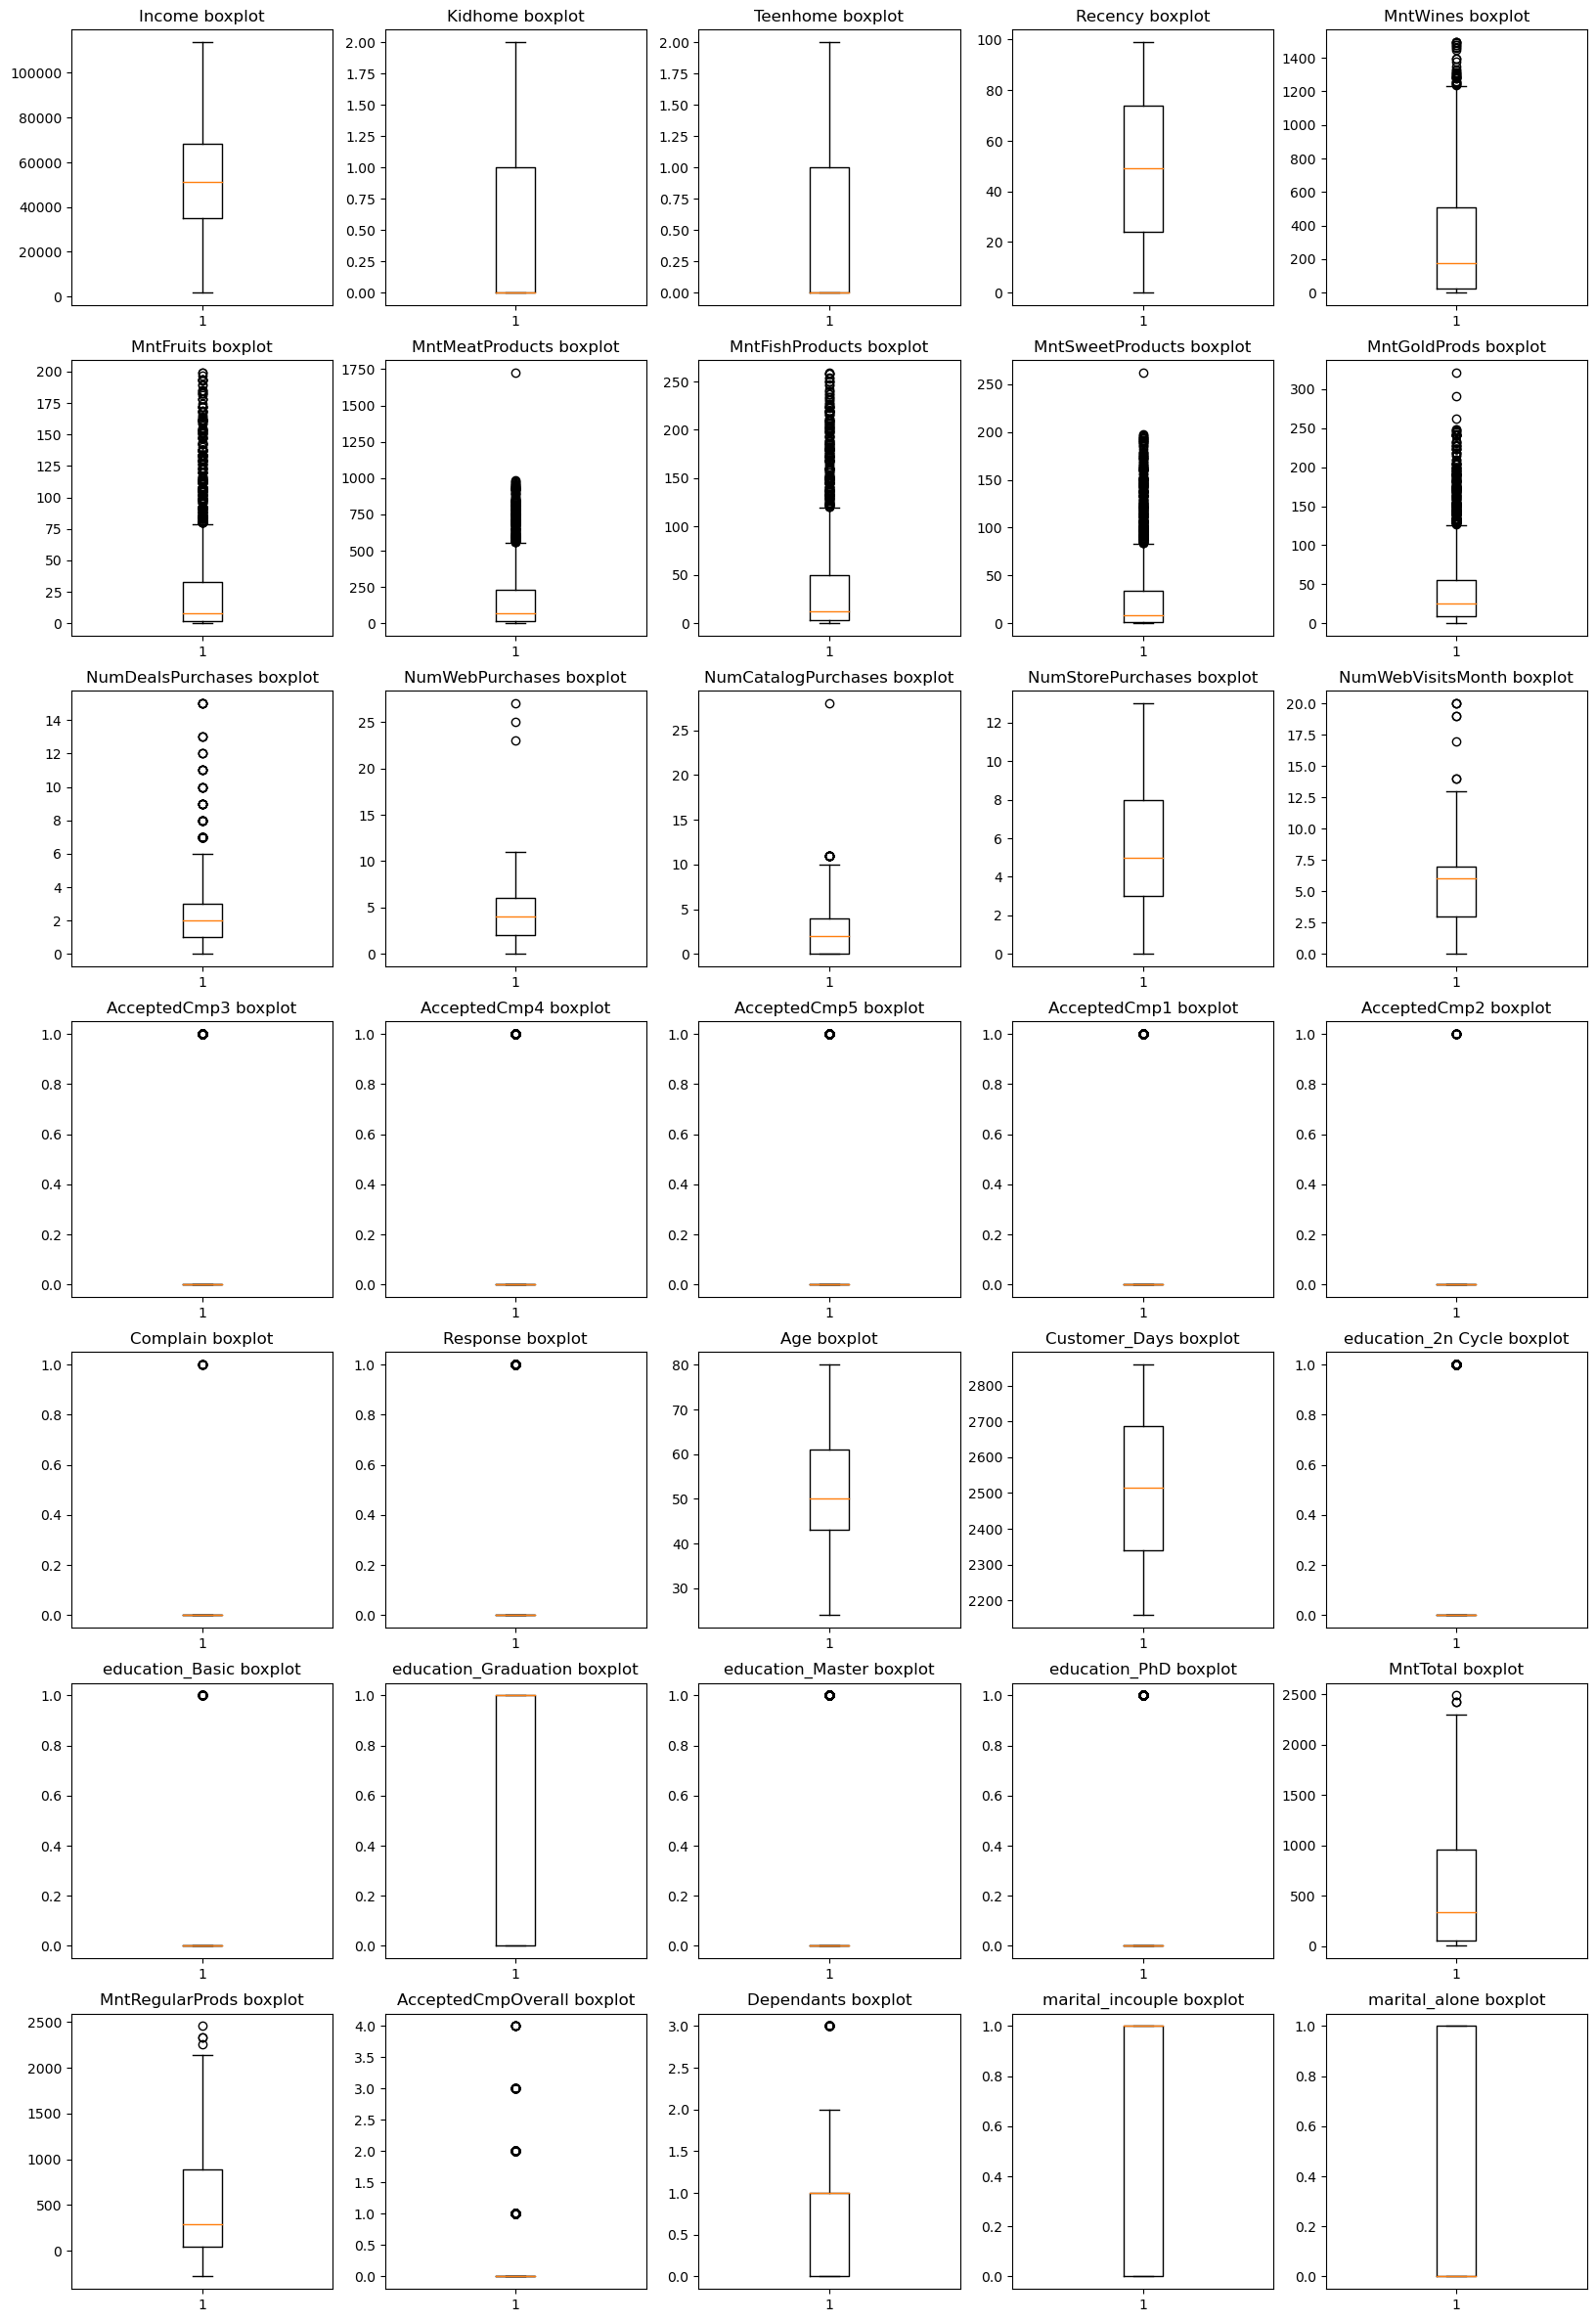

__________________________________________________________________________________________________________________________________________________________________________________
Occurences:


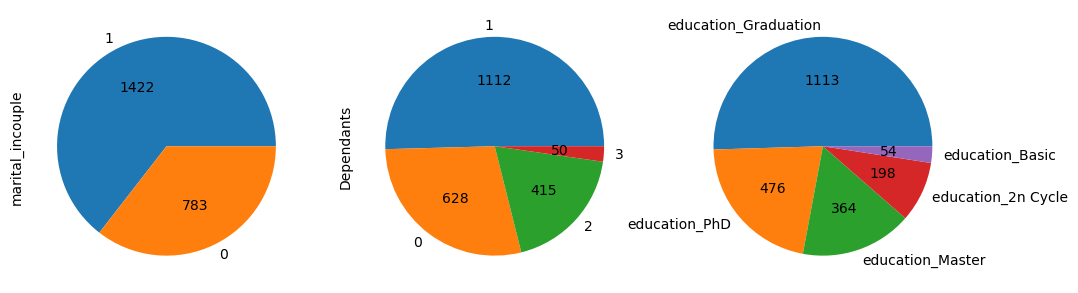

__________________________________________________________________________________________________________________________________________________________________________________
Totals and Means:


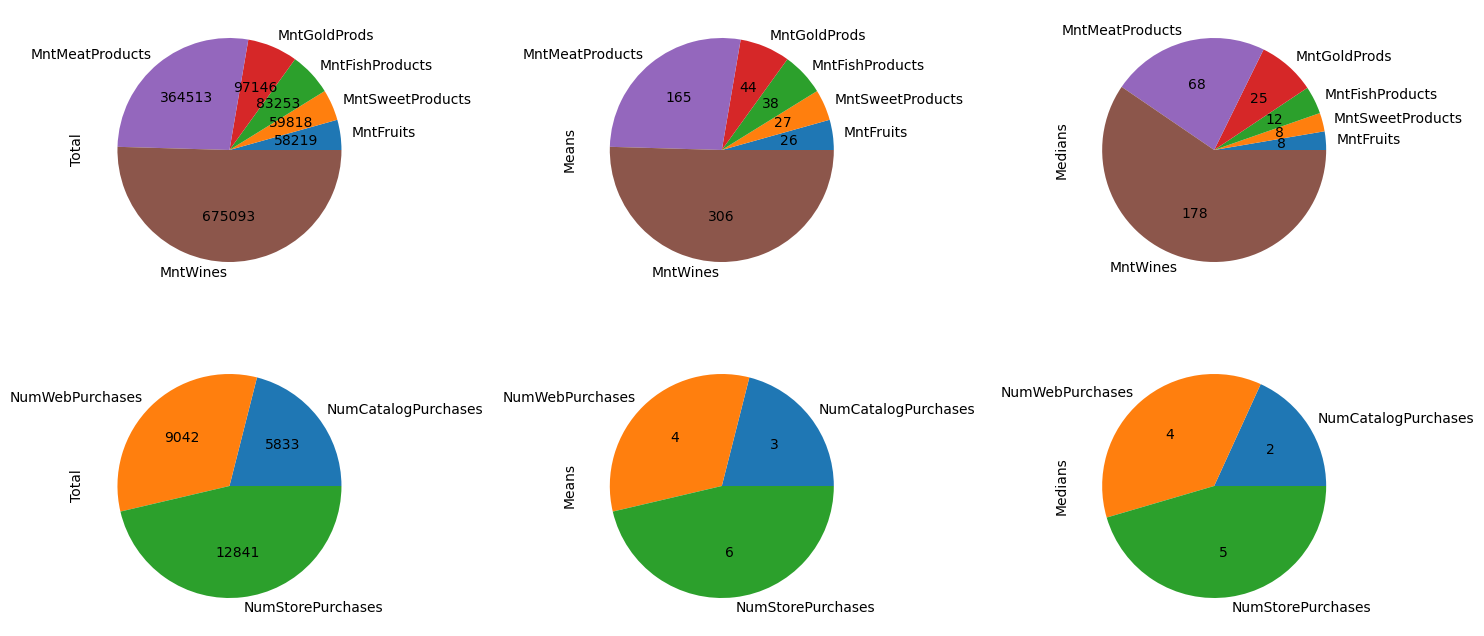

In [12]:
x = df.columns

print('Histograms:')
basic_plots(df,x,'histogram',7,5,(20,30))

print('_' * 178)
print('Boxplots:')
basic_plots(df,x,'boxplot',7,5,(20,30))

print('_' * 178)
print('Occurences:')
x = ['marital_incouple','Dependants',['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']]
basic_plots(df,x,'piechart',1,3,(12,10))

print('_' * 178)
print('Totals and Means:')
x = [['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],\
    ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
sum_mean(df,x,2,3,(18,8))

The last campaign was the most successful with the greatest number of responses (333 or 15.1%).\
It has more than doubled in comparison to the fifth one (161 or 7.3%).

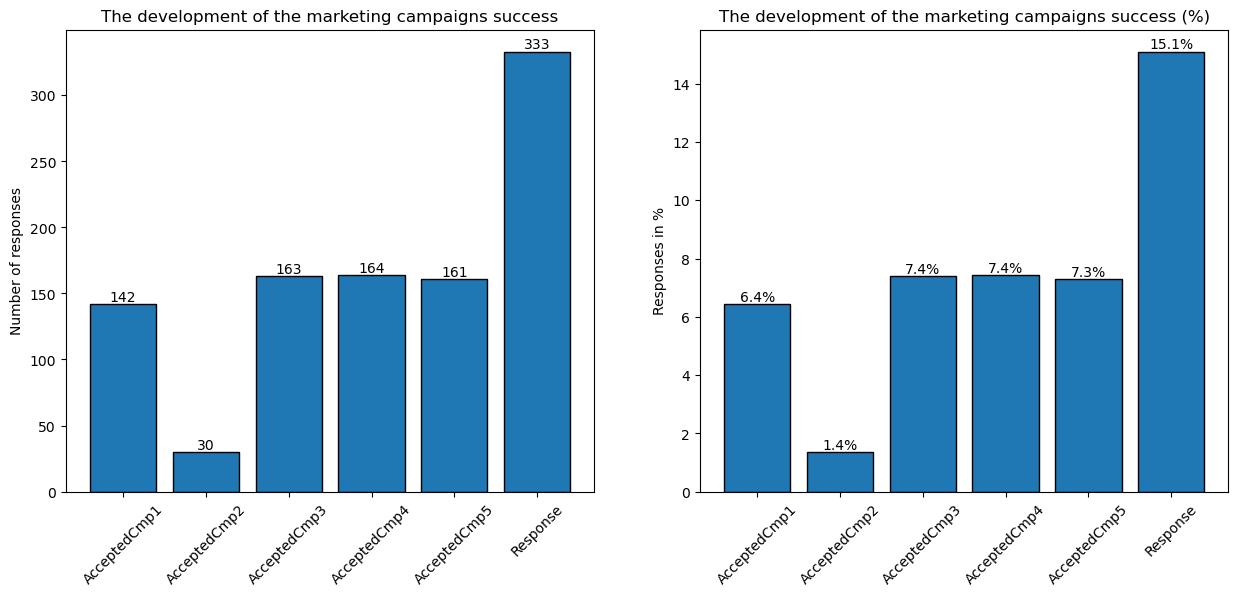

In [13]:
success = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']].sum()
mrkt_cmpn = pd.DataFrame(success).rename(columns={0: 'Success'})
mrkt_cmpn['Success%'] = (mrkt_cmpn / len(df['Response']))*100

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.ravel()

axes[0].bar(mrkt_cmpn.index, mrkt_cmpn['Success'], edgecolor='black')
axes[0].set_title('The development of the marketing campaigns success')
axes[0].set_ylabel('Number of responses')
axes[0].tick_params(axis='x',rotation=45)
for i, v in enumerate(mrkt_cmpn['Success']):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=10)

axes[1].bar(mrkt_cmpn.index, mrkt_cmpn['Success%'], edgecolor='black')
axes[1].set_title('The development of the marketing campaigns success (%)')
axes[1].set_ylabel('Responses in %')
axes[1].tick_params(axis='x',rotation=45)
for index, row in mrkt_cmpn.iterrows():
    v = row['Success%']
    axes[1].text(index, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()

The plots below have been filtered only for individuals who accepted the last campaign.\
There are some interesting differences compared to the overall dataset:
- The largest number of purchases belongs to the group with approximately $\$$80,000 of annual income (compared to $\$$40,000 in the total dataset)
- 50% of customers have dependents (vs 70%), and 48% are in a couple (vs 60%)
- There is an increased number of customers with a PhD
- On average, these customers make purchases once a month (compared to once in two months in the total dataset)
- The mean value of spending is $\$$924 (vs $\$$562)
- There is a decreased proportion of in-store purchases, with an increase in online and catalogue sales

Histograms:


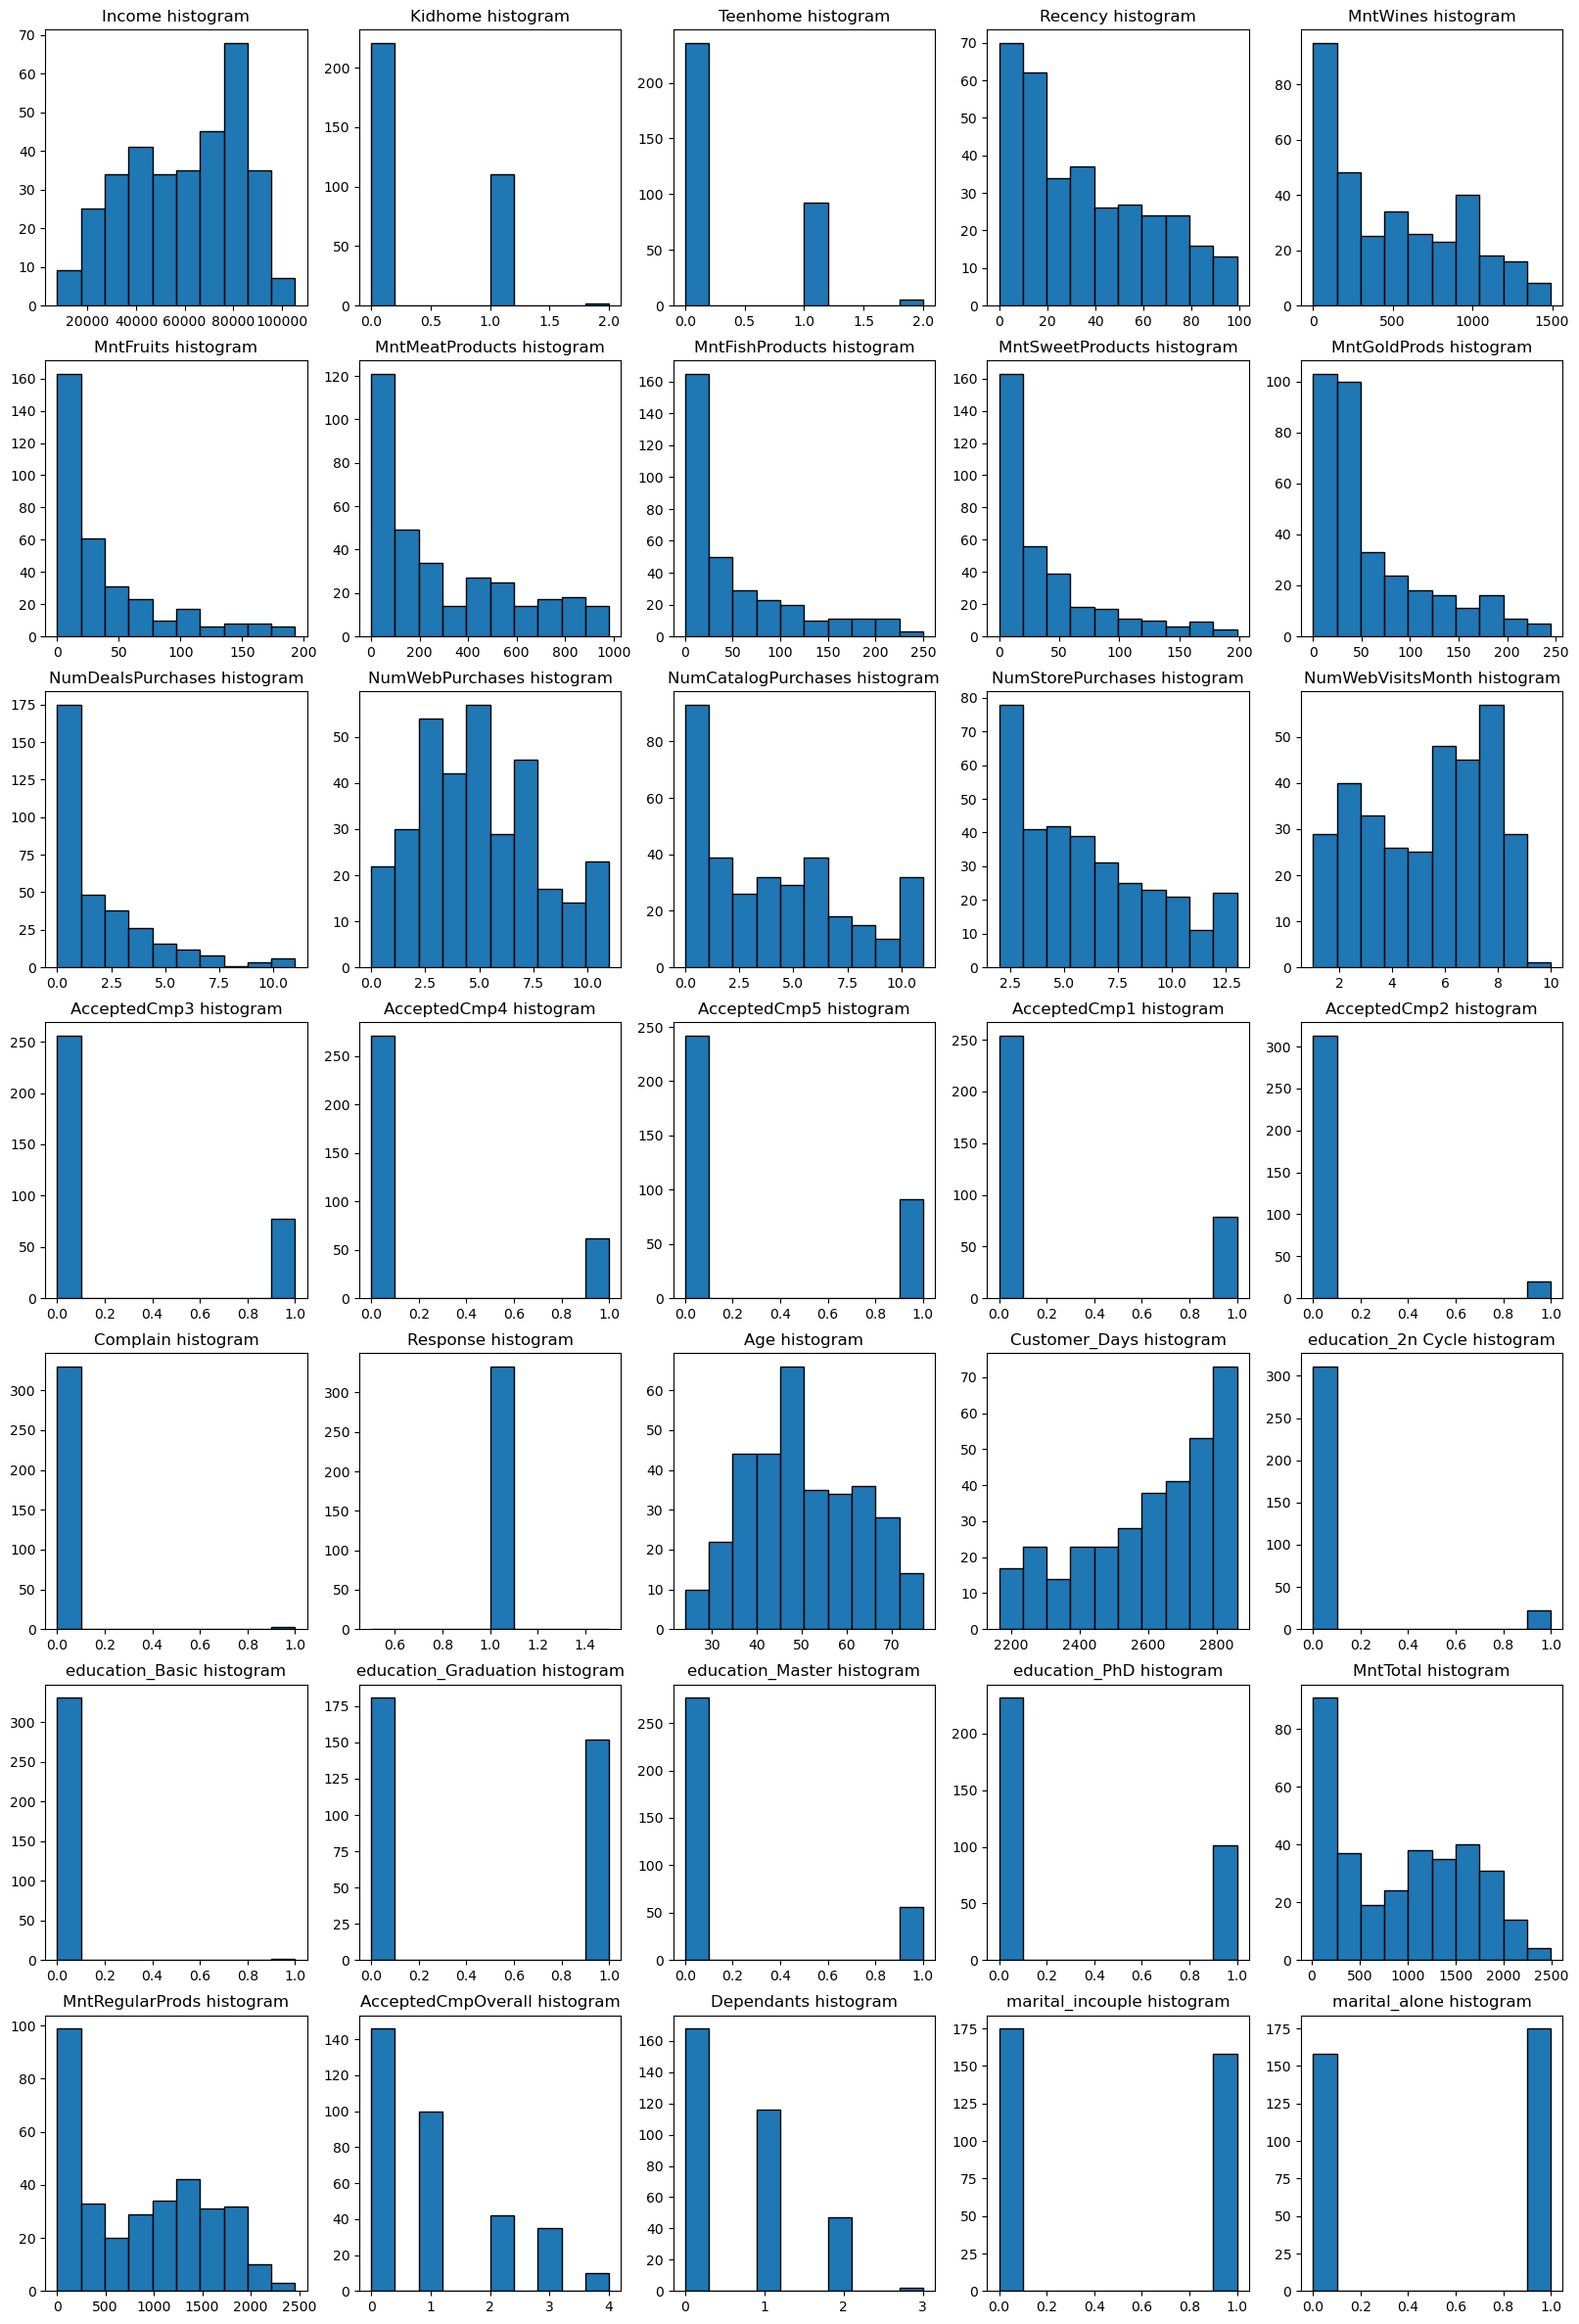

__________________________________________________________________________________________________________________________________________________________________________________
Boxplots:


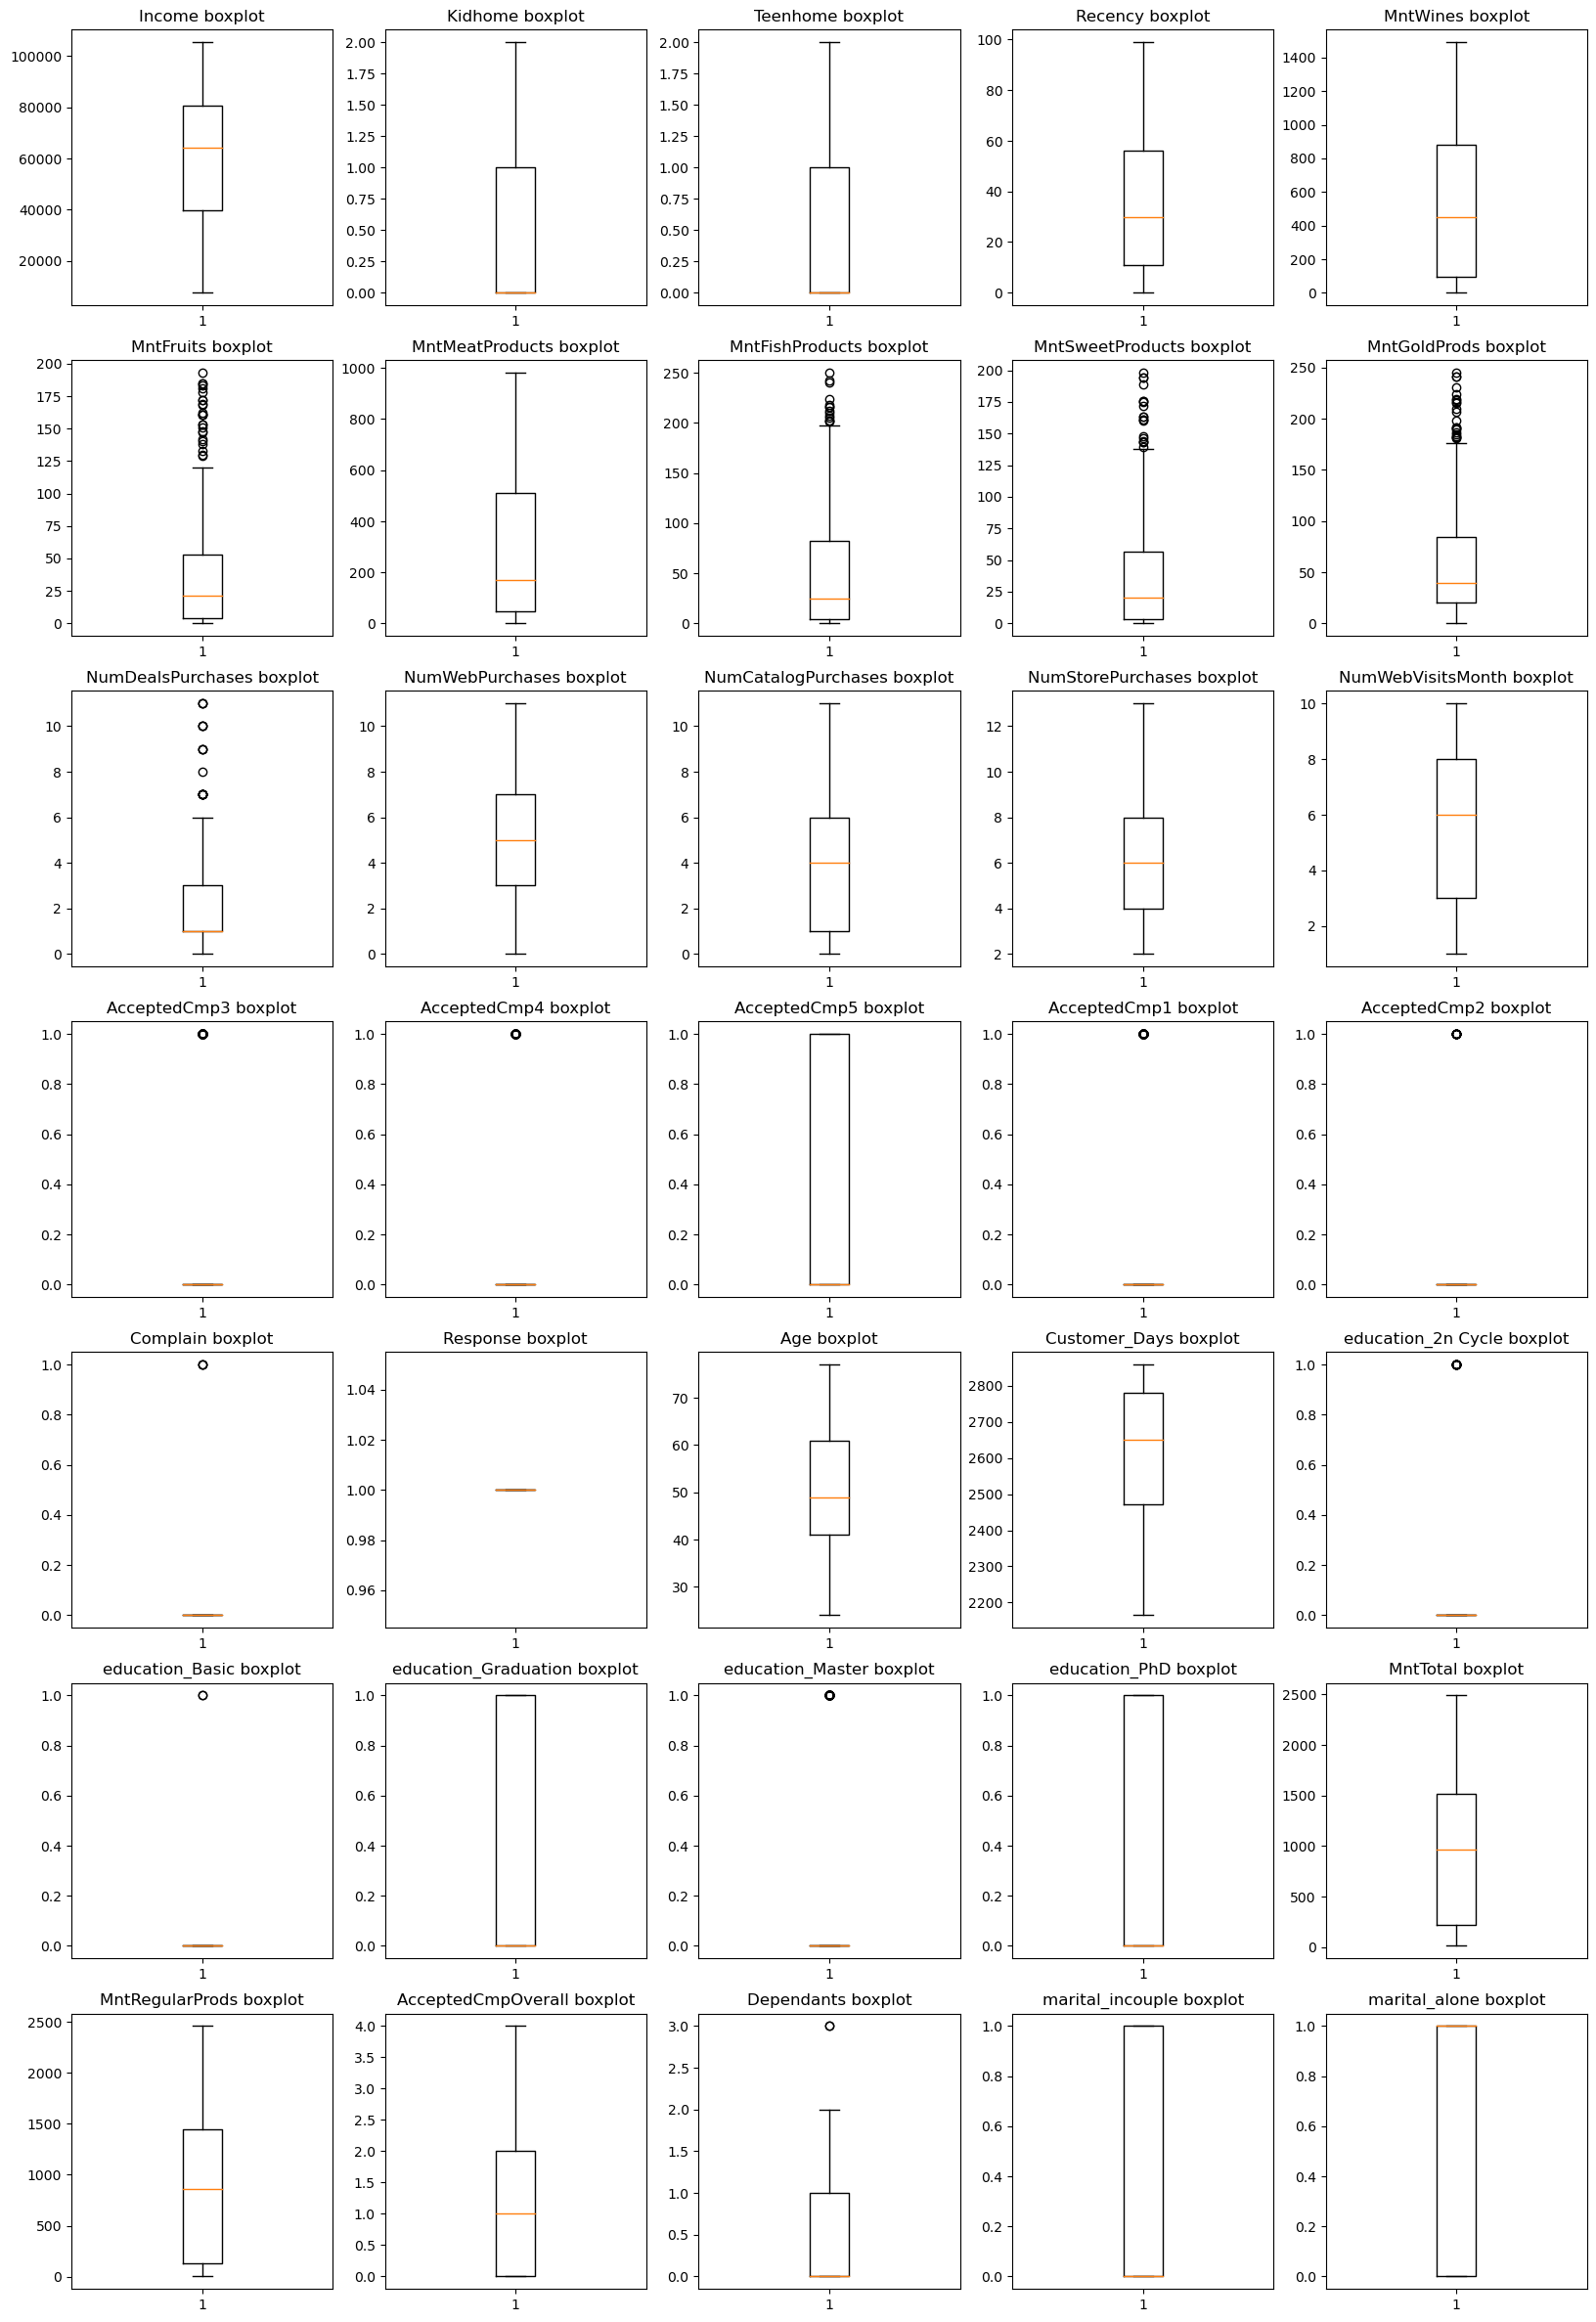

__________________________________________________________________________________________________________________________________________________________________________________
Occurences:


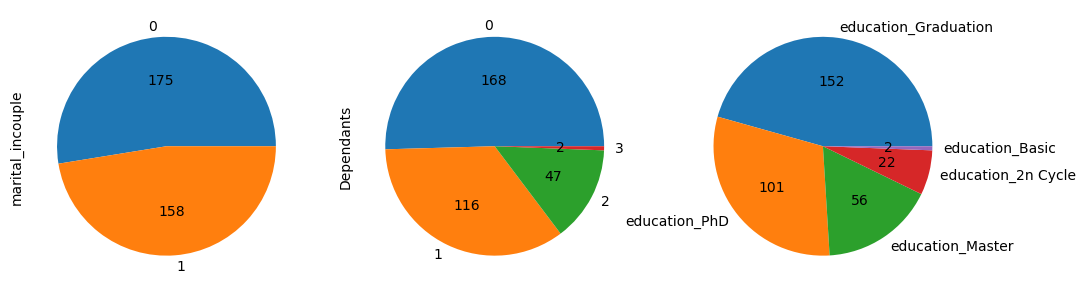

__________________________________________________________________________________________________________________________________________________________________________________
Totals and Means:


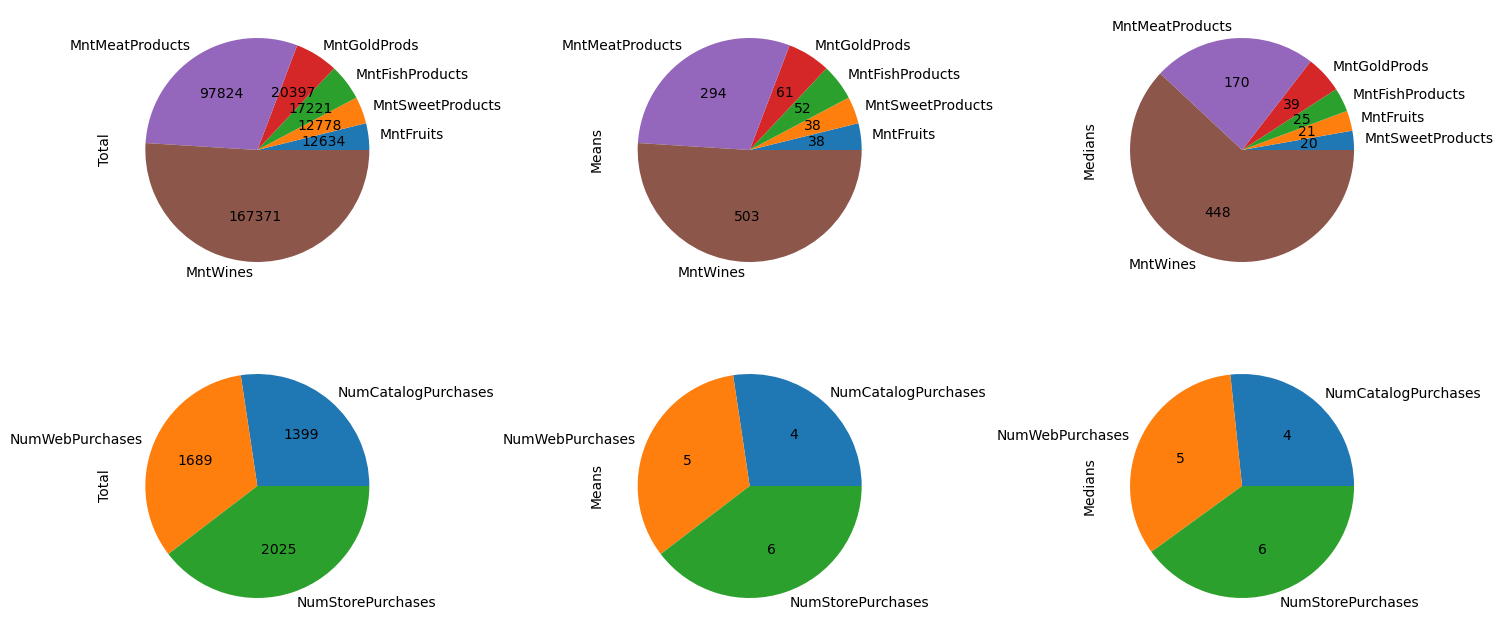

In [14]:
temp = df[df['Response']==1]
x = temp.columns

print('Histograms:')
basic_plots(temp,x,'histogram',7,5,(20,30))

print('_' * 178)
print('Boxplots:')
basic_plots(temp,x,'boxplot',7,5,(20,30))

print('_' * 178)
print('Occurences:')
x = ['marital_incouple','Dependants',['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']]
basic_plots(temp,x,'piechart',1,3,(12,10))

print('_' * 178)
print('Totals and Means:')
x = [['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],\
    ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
sum_mean(temp,x,2,3,(18,8))

Let's enhance our understanding by visualizing response percentages for certain features.\
Beginning with responses based on education, we can further validate our hypothesis that individuals with higher levels of education are more likely to respond to the latest campaign.

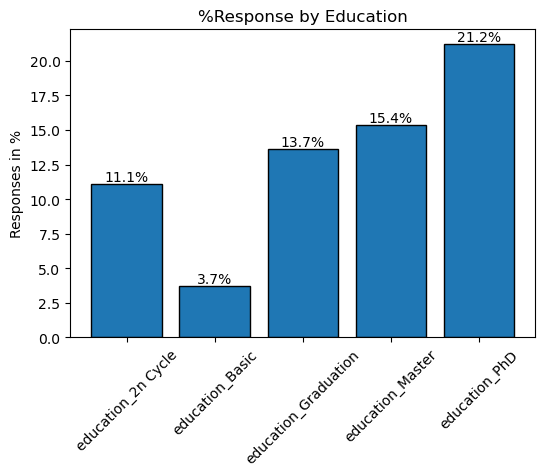

In [15]:
features = ['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']
add_plots(df,features,'%Response by Education',45,bins=None, bin_labels=None)

The subsequent feature, income, aligns with our earlier observation.\
The response rate progressively rises for each subsequent income group, starting from approximately 68k.\
Could this be attributed to highly educated individuals? We will revisit this aspect during our AB testing shortly.

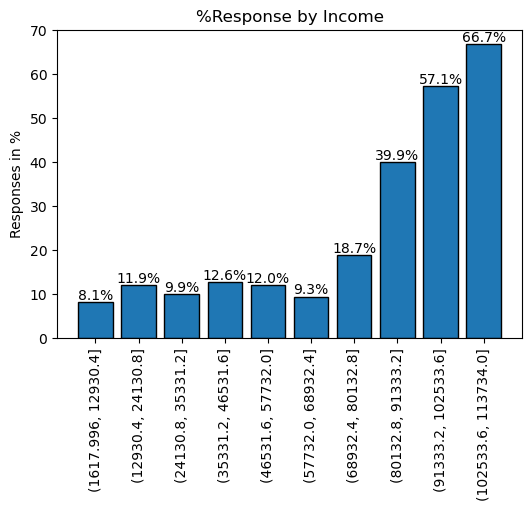

In [16]:
features = ['Income']
add_plots(df,features,'%Response by Income',90,bins=10, bin_labels=None)

The next feature under consideration is marital status. From the visualization, it is evident that single individuals exhibited a higher response rate.

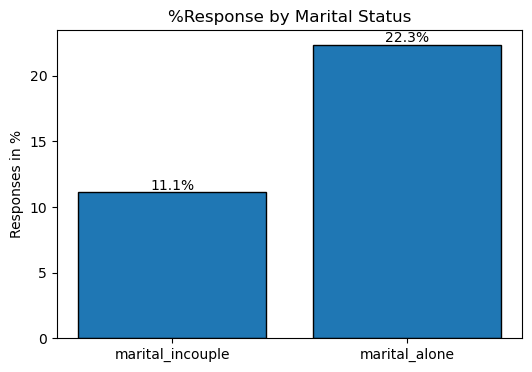

In [17]:
features = ['marital_incouple','marital_alone']
add_plots(df,features,'%Response by Marital Status',0,bins=None, bin_labels=None)

The last feature to explore is the number of dependents, where a noteworthy response rate is apparent among individuals without children.

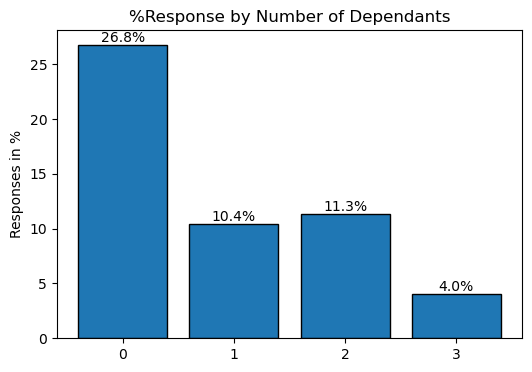

In [18]:
features = ['Dependants']
add_plots(df,features,'%Response by Number of Dependants',0,bins=4, bin_labels=[0,1,2,3])

Even though it is more a statistical analysis, let's still examine in this section the correlations based on the heatmap below:
- Higher income correlates with higher spending. Interestingly, lower income is associated with a higher likelihood of having a child
- High income suggests that an individual is more likely to make purchases via the catalogue
- Web visits are slightly more frequent among those with children. This group also frequently uses discounts, although their spending tends to be lower
- There is a correlation between purchasing Wine and Meat, indicating that these items are often bought together

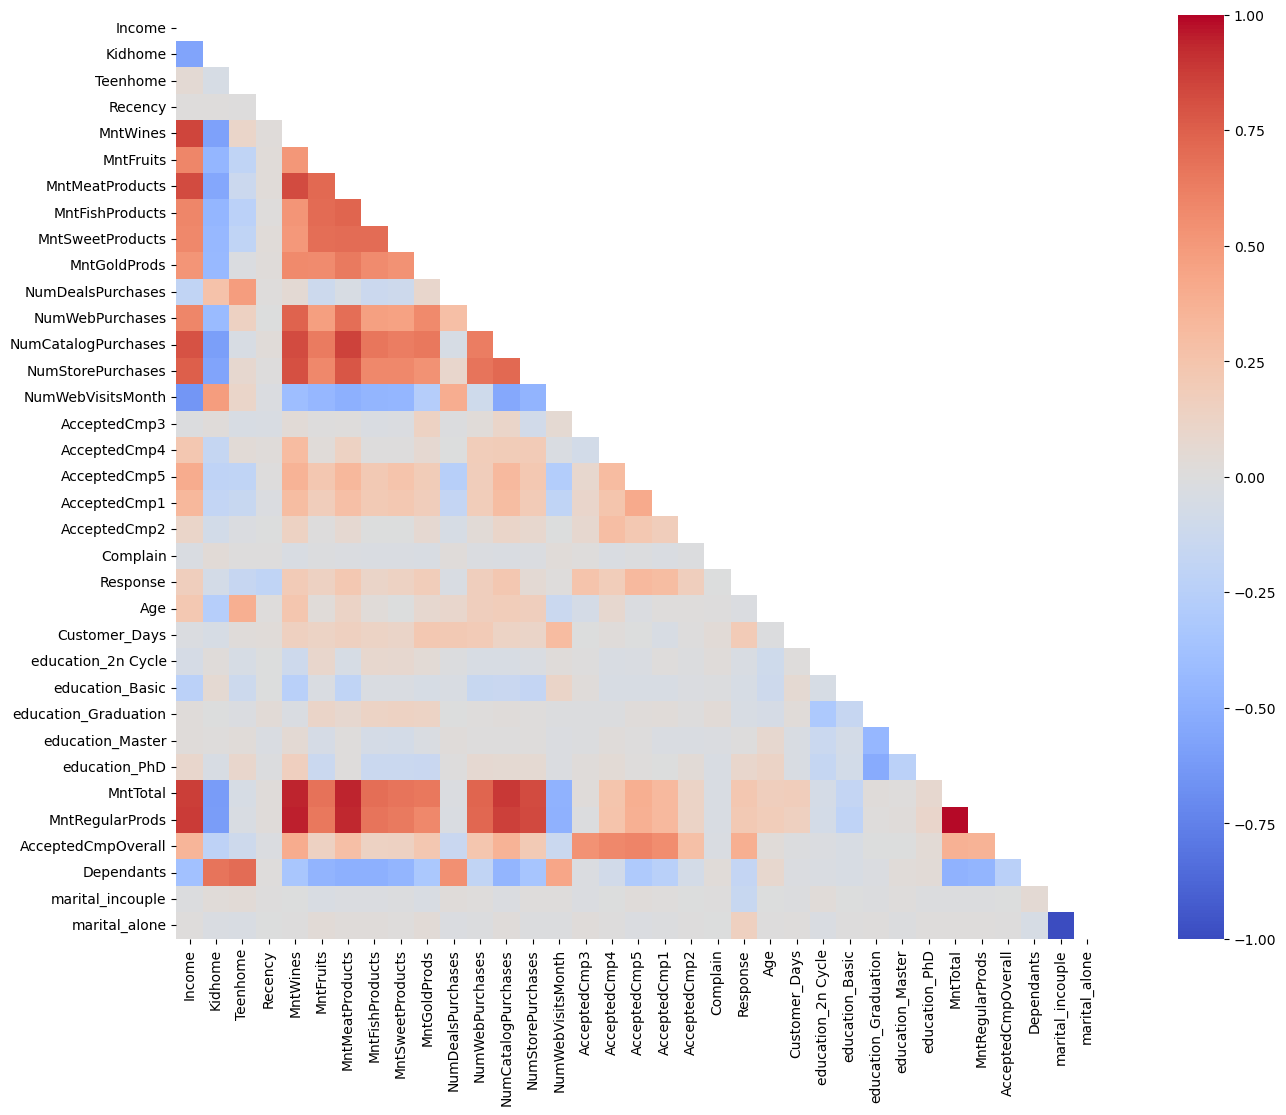

In [19]:
f, ax = plt.subplots(figsize=(20, 12))
corr = df.corr('spearman')
mask = np.triu(corr)
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', center=0, mask=mask, square=True)
plt.show()

In [20]:
def cal_cor(df,x,y,method, order,fit_reg,a):
    corr = round(df[x].corr(df[y], method=method),3)
    ax = sns.regplot(x=x,y=y,data=df, scatter_kws={'s': 5}, order=order, fit_reg=fit_reg,line_kws={'color': 'green'},ax=axes[a])
    ax.text(0.1, 0.9, f'{method} correlation between {x} and {y}: {corr}', transform=ax.transAxes, fontsize=8)
    ax.set_ylim(0,)
    return ax

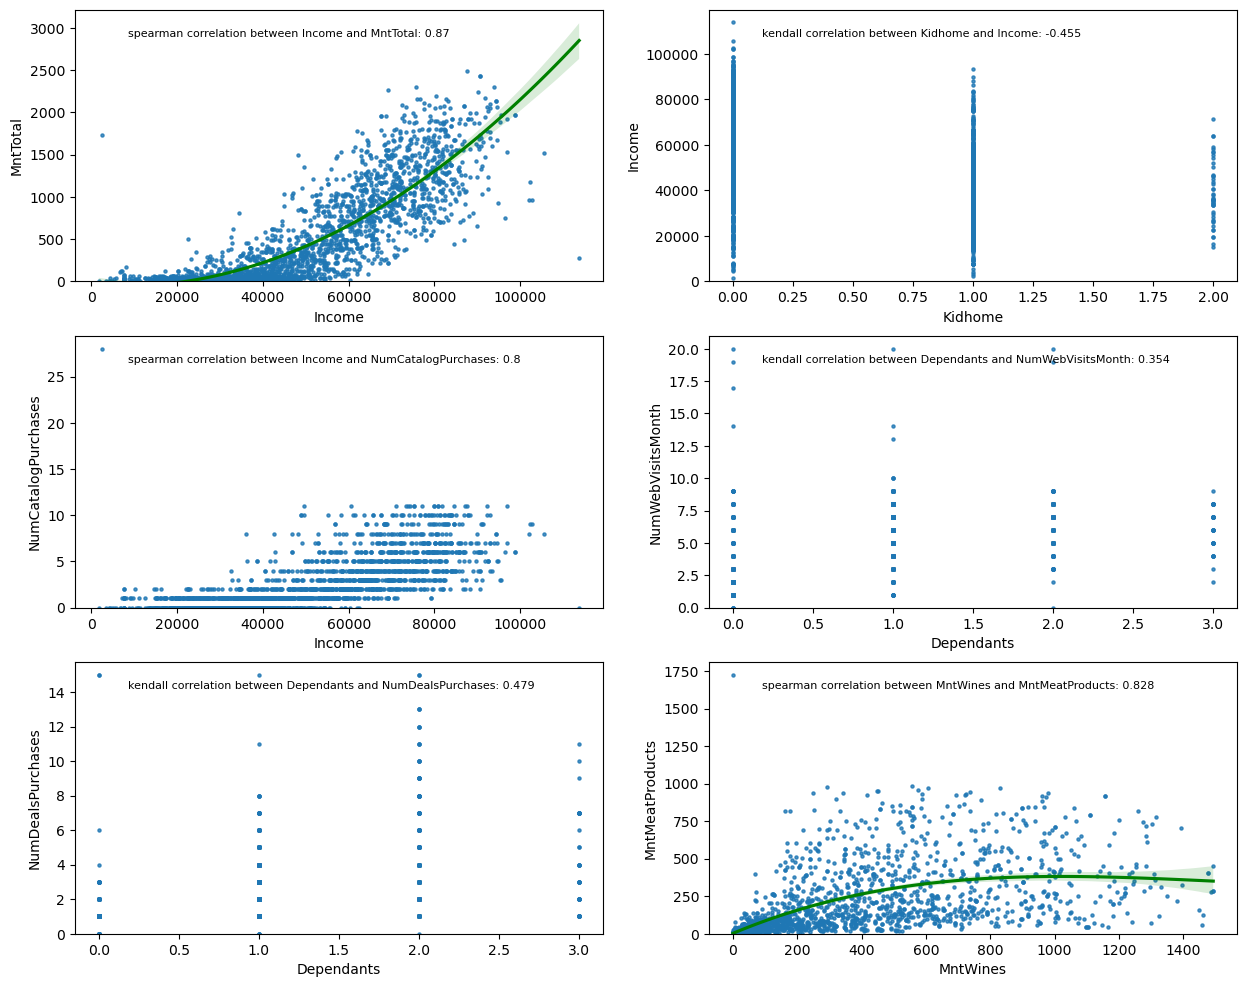

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
axes = axes.ravel()

ax0 = cal_cor(df,'Income','MntTotal','spearman',2,True,0)
ax1 = cal_cor(df,'Kidhome','Income','kendall',2,False,1)
ax2 = cal_cor(df,'Income','NumCatalogPurchases','spearman',2,False,2)
ax3 = cal_cor(df,'Dependants','NumWebVisitsMonth','kendall',2,False,3)
ax4 = cal_cor(df,'Dependants','NumDealsPurchases','kendall',2,False,4)
ax5 = cal_cor(df,'MntWines','MntMeatProducts','spearman',3,True,5)

plt.show()

## Statistical Analysis

In [22]:
def AB_testing(df,feature1,feature2,alpha, binary,threshold=0):
    if binary=='Yes':
        df1 = df[df[feature1]==1]
        df2 = df[df[feature1]==0]
    else:
        df1 = df[df[feature1]>=threshold]
        df2 = df[df[feature1]<threshold]
    df1 = df1[feature2]
    df2 = df2[feature2]
    
    t_stat, p_value, _ = sm.stats.ttest_ind(df1, df2)
    a_mean = np.mean(df1)
    b_mean = np.mean(df2)
    a_median = np.median(df1)
    b_median = np.median(df2)
    a_std = np.std(df1)
    b_std = np.std(df2)

    result = {
        'Feature': feature2,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Mean A': a_mean,
        'Mean B': b_mean,
        'Median A': a_median,
        'Median B': b_median,
        'SD A': a_std,
        'SD B': b_std
        }

    alpha = alpha
    result['Hypothesis'] = np.where(p_value < alpha, 'H1','H0')
    results = pd.DataFrame([result])

    return results

From the EDA conducted earlier, we derived 4 hypotheses that merit statistical validation.\
To assess these hypotheses, we will employ AB testing with a 95% confidence interval to either confirm or reject the null hypothesis.\

Let's initiate the analysis with the hypothesis that holding a PhD does not necessarily result in higher income (H0).\
Upon reviewing the table below, we can observe that this hypothesis has been rejected. This rejection implies that having a PhD is associated with higher income (H1), as indicated by the T-statistic and P-value.

In [23]:
results = AB_testing(df,'education_PhD','Income',.05,'Yes')
results

,Feature,T-statistic,P-value,Mean A,Mean B,Median A,Median B,SD A,SD B,Hypothesis
0,Income,4.297343,0.000018,55220.581933,50631.418161,55005.0,49854.0,18343.865519,21206.39851,H1


The next examination involves comparing single individuals with those in a couple concerning the number of dependents.\
The null hypothesis posits that single individuals have an equivalent number of dependents compared to those who are in a couple.\
Once again, this null hypothesis has been rejected. This rejection suggests that single customers tend to have fewer children (H1).

Nonetheless, it is noteworthy that, despite the rejection of the null hypothesis, looking at P-value, we can state that is only 4.4%.\
Examination of means and medians also reveals that single individuals can still have children.

In [24]:
results = AB_testing(df,'marital_alone','Dependants',.05,'Yes')
results

,Feature,T-statistic,P-value,Mean A,Mean B,Median A,Median B,SD A,SD B,Hypothesis
0,Dependants,-2.013345,0.0442,0.905492,0.972574,1.0,1.0,0.765647,0.738689,H1


Now, let's assess the null hypothesis that catalogue purchases are uniform across all individuals, unaffected by income.\
We use a median (2) for catalogue purchases in this comparison.\
The rejection of the null hypothesis affirms the earlier observation that individuals with higher income are inclined to make purchases through catalogues.

In [25]:
results = AB_testing(df,'NumCatalogPurchases','Income',.05,'No',2)
results

,Feature,T-statistic,P-value,Mean A,Mean B,Median A,Median B,SD A,SD B,Hypothesis
0,Income,51.355529,0.0,66343.102273,35749.491046,67290.5,35682.0,14718.340531,13116.539394,H1


The final examination involves testing the null hypothesis that the presence of dependants has no impact on the number of website visits.\
Once more, the null hypothesis is rejected, signifying that individuals with dependants tend to visit the website more frequently.

In [26]:
results = AB_testing(df,'Dependants','NumWebVisitsMonth',.05,'No',1)
results

,Feature,T-statistic,P-value,Mean A,Mean B,Median A,Median B,SD A,SD B,Hypothesis
0,NumWebVisitsMonth,25.392163,5.583760e-125,6.061509,3.517516,6.0,3.0,1.930142,2.54163,H1


## Feature Engineering

In [27]:
def split_scale(df,test_size):
    
    y = df['Response']
    X = df.drop('Response', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state=42)
    print(f'X train shape:{X_train.shape}')
    print(f'X test shape:{X_test.shape}')
    print(f'y train shape:{y_train.shape}')
    print(f'y test shape:{y_test.shape}')
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    X_train = pd.DataFrame(X_train,columns=X.columns)
    X_test = pd.DataFrame(X_test,columns=X.columns)
    
    del df, X, y
    return X_train,X_test,y_train,y_test,scaler

In [28]:
# tuned hyperparameters (with all features) were used here

def feature_selection(X_train,X_test,y_train,y_test,kind,num_features,xgb_type=None):
    
    if kind=='kbest':
        kbest = SelectKBest(k=num_features,score_func=f_classif)
        kbest.fit(X_train,y_train)
        col_idxs = kbest.get_support(indices=True)
        selected_features = list(X_train.iloc[:,col_idxs].columns)
        selected_features = pd.DataFrame(selected_features,columns=['feature'])
        return selected_features
        
    elif kind=='rf':
        rf = SelectFromModel(estimator=RandomForestClassifier(random_state=42,
                                                              n_jobs=-1,
                                                              max_features=num_features,
                                                              n_estimators=100,
                                                              min_samples_split=7,
                                                              min_samples_leaf=8,
                                                              max_depth=8,
                                                              criterion='entropy',
                                                              class_weight={0: 1, 1: 5},
                                                              ccp_alpha=0.001,
                                                              bootstrap=True))
        rf.fit(X_train,y_train)
        col_idxs = rf.get_support(indices=True)
        selected_features = list(X_train.iloc[:,col_idxs].columns)
        selected_features = pd.DataFrame(selected_features,columns=['feature'])
        return selected_features[:num_features]
        
    elif kind=='cb':
        cb = CatBoostClassifier(subsample=1.0, 
                                score_function='Cosine',
                                scale_pos_weight=2,
                                sampling_frequency='PerTree',
                                rsm=0.6,
                                random_strength=4,
                                posterior_sampling=True,
                                penalties_coefficient=0.01,
                                n_estimators=300,
                                min_data_in_leaf=6,
                                loss_function='Logloss',
                                leaf_estimation_iterations=5,
                                l2_leaf_reg=4.0,
                                grow_policy='Depthwise',
                                depth=7)
        cb.fit(X_train,y_train,verbose=False)
        feat_imps = np.array(cb.feature_importances_)
        features = np.array(X_train.columns)
        dict={'feature':features,'importance':feat_imps}
        selected_features = pd.DataFrame(dict).sort_values(by='importance',ascending=False)
        return selected_features[:num_features]
        
    elif kind=='cb_shap':
        cb = CatBoostClassifier(subsample=1.0, 
                                score_function='Cosine',
                                scale_pos_weight=2,
                                sampling_frequency='PerTree',
                                rsm=0.6,
                                random_strength=4,
                                posterior_sampling=True,
                                penalties_coefficient=0.01,
                                n_estimators=300,
                                min_data_in_leaf=6,
                                loss_function='Logloss',
                                leaf_estimation_iterations=5,
                                l2_leaf_reg=4.0,
                                grow_policy='Depthwise',
                                depth=7)
        cb.fit(X_train,y_train,verbose=False)
        explainer = shap.Explainer(cb)
        shap_values = explainer(X_test)
        shap_importance = shap_values.abs.mean(0).values
        sorted_idxs = shap_importance.argsort()
        feature_names = shap_values.feature_names
        shap_df = pd.DataFrame(shap_values.values,columns=feature_names)
        vals = np.abs(shap_df.values).mean(0)
        shap_importance = pd.DataFrame(list(zip(feature_names,vals)),columns=['feature','importance'])
        shap_importance.sort_values(by=['importance'],ascending=False,inplace=True)
        return shap_importance[:num_features]
        
    elif kind=='xgb':
        xgb = XGBClassifier(random_state=42,
                         n_jobs=-1,
                         subsample=1.0,
                         scale_pos_weight=8,
                         reg_lambda=1.8,
                         reg_alpha=0,
                         n_estimators=500,
                         min_child_weight=11,
                         max_depth=5,
                         max_delta_step=0.5,
                         learning_rate=0.6,
                         gamma=1.2
                        )
        xgb.fit(X_train, y_train)
        
        feat_imps = xgb.get_booster().get_score(importance_type=xgb_type)
        keys = list(feat_imps.keys())
        values = list(feat_imps.values())
        feat_imps_df =pd.DataFrame(data=values,index=keys,columns=['importance']).sort_values(by='importance',ascending=False).reset_index()
        feat_imps_df.rename({'index':'feature'},axis=1,inplace=True)
        return feat_imps_df[:num_features]

Let's now examine the importance of features using various approaches.\
This aspect is interesting not only for subsequent modeling but also for devising future marketing campaigns.

In [29]:
X_train,X_test,y_train,y_test,scaler = split_scale(df,.2)

X train shape:(1764, 35)
X test shape:(441, 35)
y train shape:(1764,)
y test shape:(441,)


In [30]:
feature_selection(X_train,X_test,y_train,y_test,'kbest',10)

,feature
0,MntWines
1,MntMeatProducts
2,NumCatalogPurchases
3,AcceptedCmp3
4,AcceptedCmp5
5,AcceptedCmp1
6,Customer_Days
7,MntTotal
8,MntRegularProds
9,AcceptedCmpOverall


In [31]:
feature_selection(X_train,X_test,y_train,y_test,'rf',10)

,feature
0,Income
1,Recency
2,MntWines
3,MntMeatProducts
4,MntGoldProds
5,NumCatalogPurchases
6,NumStorePurchases
7,NumWebVisitsMonth
8,AcceptedCmp5
9,Customer_Days


In [32]:
feature_selection(X_train,X_test,y_train,y_test,'cb',10)

,feature,importance
3,Recency,13.043097
30,AcceptedCmpOverall,11.743344
22,Customer_Days,10.512911
14,NumWebVisitsMonth,5.143639
12,NumCatalogPurchases,4.738721
13,NumStorePurchases,4.210973
6,MntMeatProducts,4.004773
0,Income,3.278009
9,MntGoldProds,2.968997
33,marital_alone,2.922849


In [33]:
feature_selection(X_train,X_test,y_train,y_test,'cb_shap',10)

,feature,importance
3,Recency,0.583558
22,Customer_Days,0.483677
30,AcceptedCmpOverall,0.482698
14,NumWebVisitsMonth,0.246604
33,marital_alone,0.195182
2,Teenhome,0.184831
13,NumStorePurchases,0.180902
32,marital_incouple,0.175002
12,NumCatalogPurchases,0.160748
6,MntMeatProducts,0.143106


In [34]:
feature_selection(X_train,X_test,y_train,y_test,'xgb',10,'weight')

,feature,importance
0,Recency,46.0
1,Customer_Days,43.0
2,MntMeatProducts,29.0
3,MntSweetProducts,28.0
4,Age,27.0
5,MntWines,24.0
6,NumWebVisitsMonth,23.0
7,MntGoldProds,23.0
8,NumStorePurchases,22.0
9,MntRegularProds,21.0


In [35]:
feature_selection(X_train,X_test,y_train,y_test,'xgb',10,'gain')

,feature,importance
0,AcceptedCmpOverall,79.450424
1,marital_incouple,19.533663
2,Recency,16.871283
3,Customer_Days,14.932731
4,NumWebVisitsMonth,12.960338
5,MntMeatProducts,12.906501
6,NumCatalogPurchases,11.966096
7,Teenhome,11.003956
8,Income,10.867389
9,education_PhD,10.279765


In [36]:
feature_selection(X_train,X_test,y_train,y_test,'xgb',10,'cover')

,feature,importance
0,AcceptedCmpOverall,360.878937
1,AcceptedCmp3,206.936890
2,marital_incouple,204.178391
3,education_2n Cycle,196.522247
4,Teenhome,188.220032
5,MntGoldProds,187.856400
6,Recency,170.588882
7,NumStorePurchases,156.847305
8,AcceptedCmp1,156.417725
9,education_PhD,150.180862


In [37]:
feature_selection(X_train,X_test,y_train,y_test,'xgb',10,'total_gain')

,feature,importance
0,AcceptedCmpOverall,1589.008545
1,Recency,776.078979
2,Customer_Days,642.107422
3,MntMeatProducts,374.288513
4,marital_incouple,332.072266
5,NumWebVisitsMonth,298.087769
6,Income,217.347778
7,MntGoldProds,197.114487
8,NumStorePurchases,193.113708
9,NumCatalogPurchases,179.491440


In [38]:
feature_selection(X_train,X_test,y_train,y_test,'xgb',10,'total_cover')

,feature,importance
0,Recency,7847.088867
1,AcceptedCmpOverall,7217.578613
2,Customer_Days,6422.468262
3,MntGoldProds,4320.697266
4,MntMeatProducts,4223.057129
5,marital_incouple,3471.032715
6,NumStorePurchases,3450.640625
7,NumWebVisitsMonth,2888.486816
8,MntWines,2539.322998
9,MntRegularProds,2508.648926


Below, you can find the list of final features.\
As observed earlier, Wine, Meat, Catalogue, Income, and PhD education are significant variables for predicting potential campaign acceptance.\
However, in future campaigns, emphasizing recency—supporting customers who make frequent purchases—could be particularly useful.

In [39]:
final_features = ['MntWines','MntMeatProducts','NumCatalogPurchases','AcceptedCmpOverall','Customer_Days','Recency','Income','MntGoldProds','NumStorePurchases',\
                  'NumWebVisitsMonth','marital_alone','Teenhome','Age','education_PhD','education_2n Cycle'
]

X_train = X_train.loc[:,final_features]
X_test = X_test.loc[:,final_features]

## Modeling

### Classification

Given the context of marketing campaigns, it becomes imperative to maximize the reach of the target group, aiming to increase the number of potential responses.\
Hence, the choice of recall_macro is justified.\
Additionally, it's important to note that the success rate or precision for category 1 must not fall below the Human Level Performance, which is 15.2%.\

In [40]:
models = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

In [41]:
def save_output(y_test,y_hat,model):
    precision = np.round(precision_score(y_test,y_hat,average='macro'),3)
    recall = np.round(recall_score(y_test,y_hat,average='macro'),3)
    f1 = np.round(f1_score(y_test,y_hat,average='macro'),3)
    roc_auc = np.round(roc_auc_score(y_test,y_hat,average='macro'),3)
    
    models.append(model)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

In [42]:
def reports(y_test, y_hat):
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_hat))

    ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
    PrecisionRecallDisplay.from_predictions(y_test,y_hat)
    RocCurveDisplay.from_predictions(y_test,y_hat)

#### Logistic Regression

In [43]:
%%time
par_log = {
    'penalty': ['l2'],
    'solver' : ['lbfgs','liblinear'],
    'C': np.logspace(-4, 3, 8),
    'class_weight':[{0:1,1:1},{0:1,1:3},{0:1,1:5},{0:1,1:8},{0:1,1:10},{0:1,1:20},{0:1,1:30},{0:1,1:50},{0:1,1:75},{0:1,1:100},'balanced'] 
}

logistic = LogisticRegression(max_iter=10000, random_state=42)
search = RandomizedSearchCV(logistic, par_log, n_jobs=-1, scoring='recall_macro',random_state=42)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.811):
{'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 1.0}
CPU times: total: 281 ms
Wall time: 7.46 s



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       378
           1       0.41      0.79      0.54        63

    accuracy                           0.81       441
   macro avg       0.69      0.80      0.71       441
weighted avg       0.88      0.81      0.83       441



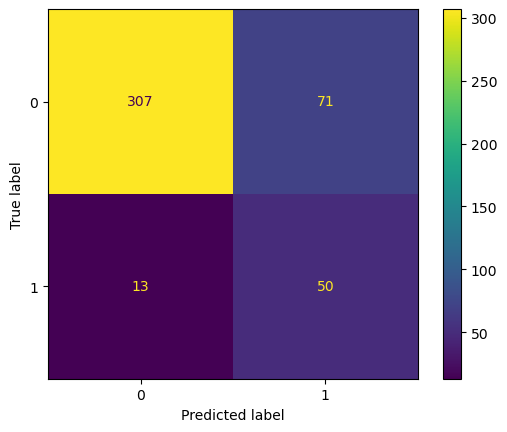

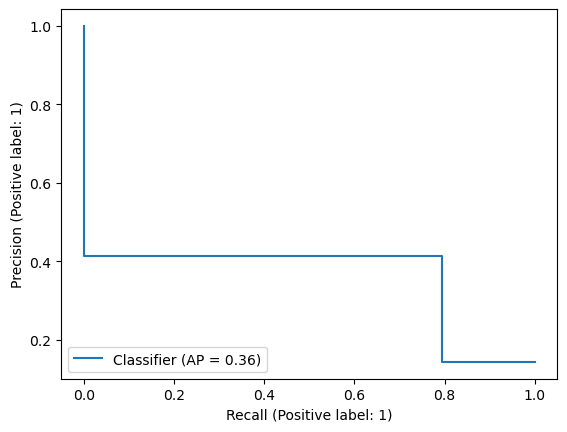

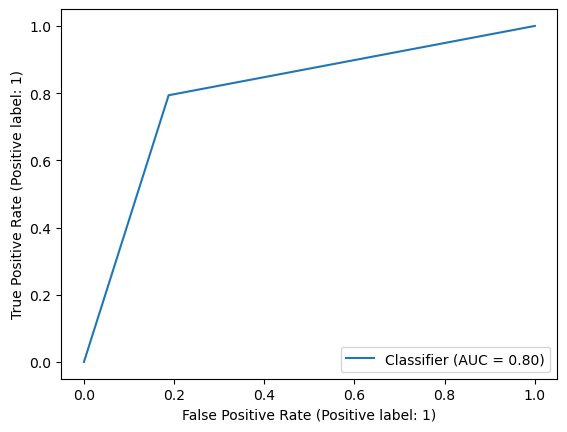

In [44]:
logistic_best = LogisticRegression(**search.best_params_,max_iter=10000, random_state=42)
logistic_best.fit(X_train, y_train)
y_hat = logistic_best.predict(X_test)

save_output(y_test,y_hat,'logistic')
reports(y_test, y_hat)

#### Random Forest Classifier

In [45]:
%%time
par = {
    'bootstrap': [True,False],
    'n_estimators':[100,200,300,400,500],
    'ccp_alpha':[0,.001,.01,.1],
    'criterion':['gini','entropy'],
    'min_samples_split':[4,6,7,8],
    'min_samples_leaf':[4,5,6,7,8],
    'max_depth':[6,7,8],
    'class_weight':[{0:1,1:1},{0:1,1:3},{0:1,1:5},{0:1,1:10},{0:1,1:15},'Balanced']
}

rf = RandomForestClassifier(random_state=42)
search3 = RandomizedSearchCV(rf, par, n_jobs=-1, scoring='recall_macro',random_state=42)
search3.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search3.best_score_)
print(search3.best_params_)

Best parameter (CV score=0.826):
{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_depth': 8, 'criterion': 'gini', 'class_weight': {0: 1, 1: 15}, 'ccp_alpha': 0.001, 'bootstrap': True}
CPU times: total: 1.44 s
Wall time: 15.8 s



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       378
           1       0.36      0.83      0.50        63

    accuracy                           0.77       441
   macro avg       0.66      0.79      0.67       441
weighted avg       0.88      0.77      0.80       441



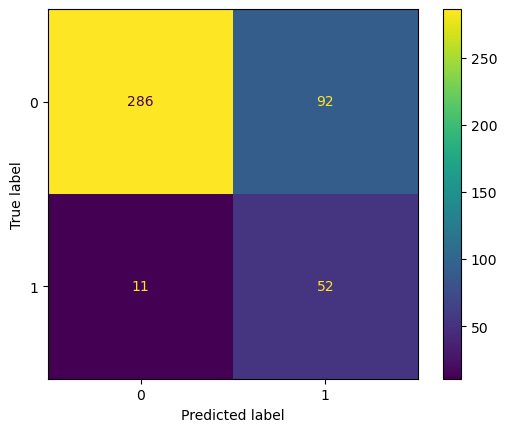

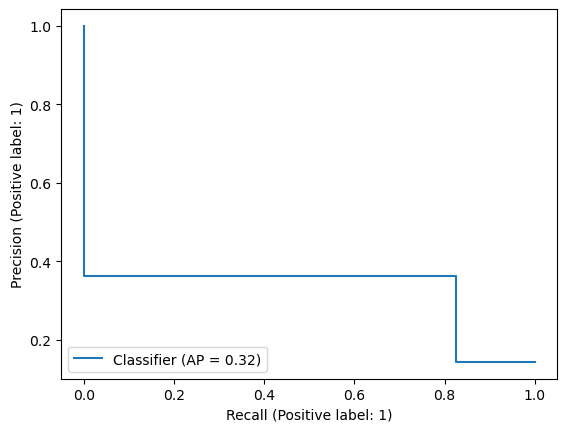

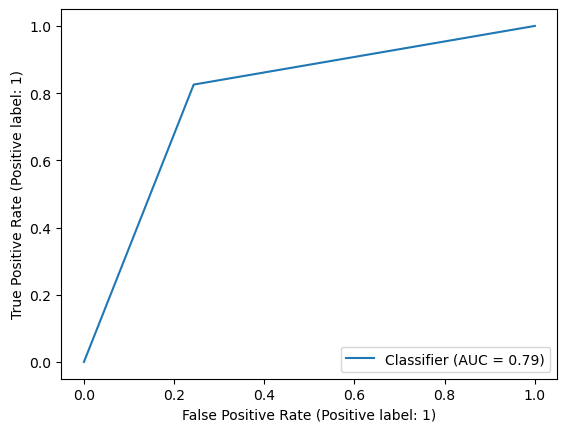

In [46]:
rf_best = RandomForestClassifier(**search3.best_params_, random_state=42)
rf_best.fit(X_train, y_train)
y_hat = rf_best.predict(X_test)

save_output(y_test,y_hat,'RF')
reports(y_test, y_hat)

#### XGB Classifier

In [47]:
%%time 
par = {
    'min_child_weight':[10,12,15,20],
    'gamma':[.8,1,1.2,1.5,1.8,2,2.2,2.5],
    'subsample':[.7,.8,.9,1],
    'max_depth':range(5,10,1),
    'learning_rate':[.1,.2,.3,.4,.5,.6],
    'scale_pos_weight':np.arange(1,10,1),
    'reg_lambda':[1,1.5,1.8,2,2.2,2.5],
    'max_delta_step':[.05,.1,.15,.3,.5],
    'min_child_weight':[8,9,10,11,12],
    'n_estimators':np.arange(100,600,100),
    'reg_alpha':[0,.001,.003,.01]
}

xgb = XGBClassifier(random_state=42,n_jobs=-1)
search4 = RandomizedSearchCV(xgb, par, n_jobs=-1, scoring='recall_macro',random_state=42)
search4.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search4.best_score_)
print(search4.best_params_)

Best parameter (CV score=0.837):
{'subsample': 0.9, 'scale_pos_weight': 8, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 12, 'max_depth': 9, 'max_delta_step': 0.05, 'learning_rate': 0.2, 'gamma': 2.5}
CPU times: total: 2.78 s
Wall time: 4.97 s



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       378
           1       0.39      0.86      0.53        63

    accuracy                           0.79       441
   macro avg       0.68      0.82      0.70       441
weighted avg       0.89      0.79      0.82       441



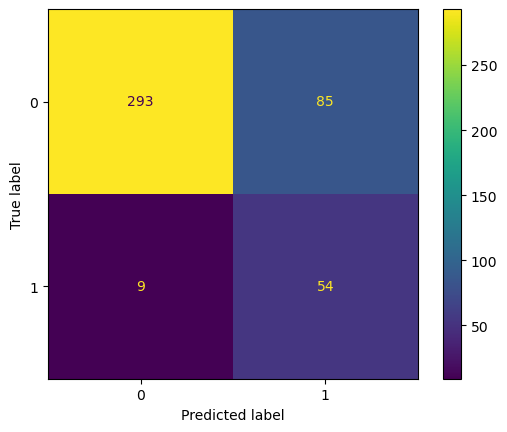

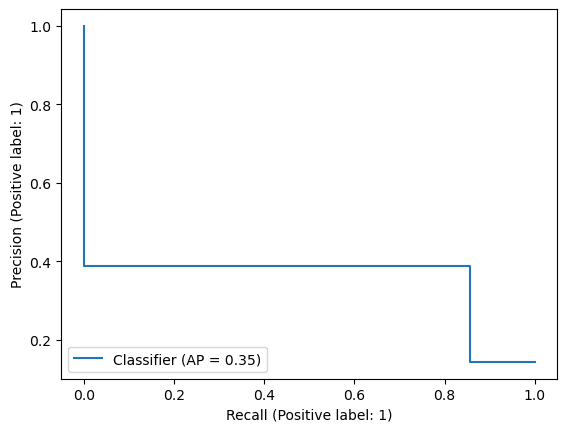

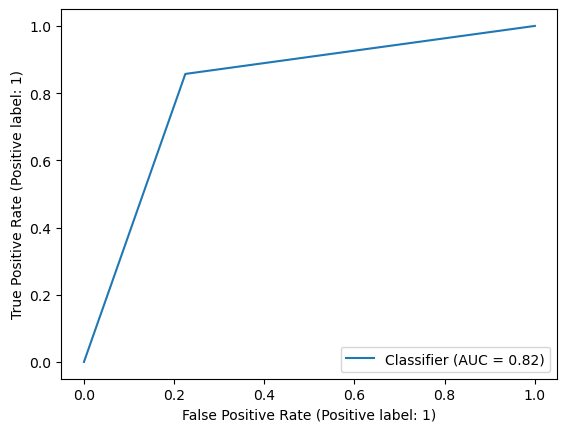

In [48]:
xgb_best = XGBClassifier(**search4.best_params_, random_state=42,n_jobs=-1)
xgb_best.fit(X_train, y_train)
y_hat = xgb_best.predict(X_test)

save_output(y_test,y_hat,'XGB')
reports(y_test, y_hat)

#### CB Classifier

In [49]:
%%time 
par = {
    'depth': np.arange(5, 11, 1),
    'scale_pos_weight': np.arange(1, 10, 1),
    'penalties_coefficient': [0.001, 0.01, 0.03, 0.1, 0.3],
    'l2_leaf_reg': np.linspace(1, 6, 11),
    'random_strength': np.arange(0, 11, 2),
    'rsm': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'subsample': [0.5, 0.8, 1.0],
    'posterior_sampling': [False, True],
    'min_data_in_leaf': np.arange(3, 10, 1),
    'loss_function': ['Logloss'],
    'score_function': ['Cosine', 'L2'],
    'leaf_estimation_iterations': np.arange(5, 30, 5),
    'n_estimators': np.arange(100, 400, 100),
    'sampling_frequency': ['PerTreeLevel', 'PerTree'],
    'grow_policy': ['Symmetric', 'Depthwise']
}

cb = CatBoostClassifier(random_state=42,verbose=False)
search5 = RandomizedSearchCV(cb, par, n_jobs=-1, scoring='recall_macro',random_state=42)
search5.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search5.best_score_)
print(search5.best_params_)

Best parameter (CV score=0.802):
{'subsample': 0.8, 'score_function': 'L2', 'scale_pos_weight': 4, 'sampling_frequency': 'PerTreeLevel', 'rsm': 0.7, 'random_strength': 6, 'posterior_sampling': True, 'penalties_coefficient': 0.3, 'n_estimators': 100, 'min_data_in_leaf': 9, 'loss_function': 'Logloss', 'leaf_estimation_iterations': 5, 'l2_leaf_reg': 4.0, 'grow_policy': 'Depthwise', 'depth': 9}
CPU times: total: 7.11 s
Wall time: 1min 11s



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       378
           1       0.53      0.65      0.58        63

    accuracy                           0.87       441
   macro avg       0.73      0.78      0.75       441
weighted avg       0.88      0.87      0.87       441



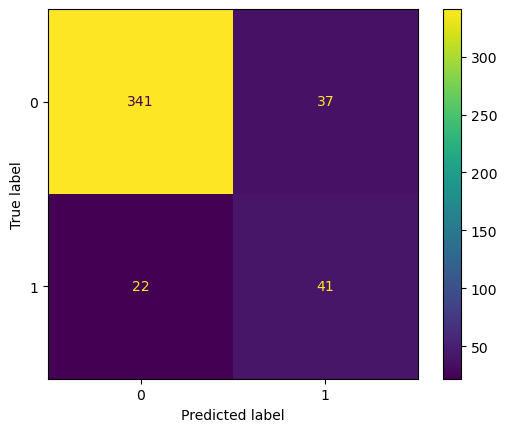

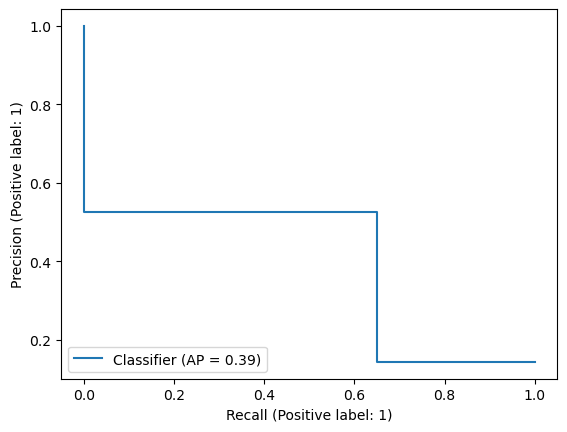

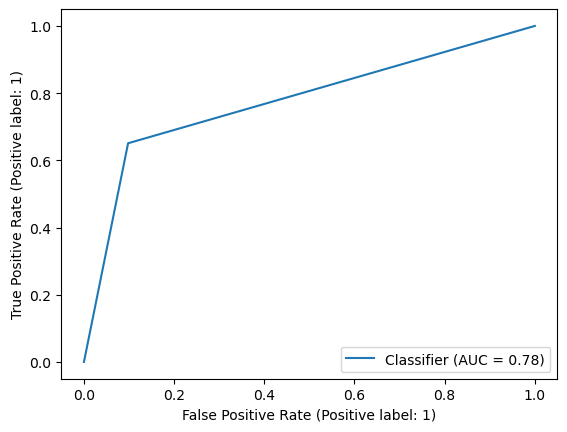

In [50]:
cb_best = CatBoostClassifier(**search5.best_params_, random_state=42,verbose=False)
cb_best.fit(X_train, y_train)
y_hat = cb_best.predict(X_test)

save_output(y_test,y_hat,'CB')
reports(y_test, y_hat)

#### Support Vector Machine

In [51]:
%%time 
par = {
    'C':[0,.1,.5,1,1.5,1.6,1.7,1.8,1.9,2,2.25,3,5,10],
    'kernel':['poly','rbf','sigmoid'],
    'degree':[1,2,3,4,5,6],
    'gamma':['scale','auto'],
    'coef0':[1,1.2,1.3,1.4,1.5,1.75,2,2.1,2.2,3,4,5,6,7,8],
    'class_weight':[{0:1,1:1},{0:1,1:3},{0:1,1:5},{0:1,1:7},{0:1,1:10},{0:1,1:20},{0:1,1:30},{0:1,1:50},{0:1,1:75},'balanced']                    
}

svm = SVC(random_state=42)
search6 = RandomizedSearchCV(svm, par, n_jobs=-1, scoring='recall_macro',random_state=42)
search6.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search6.best_score_)
print(search6.best_params_)

Best parameter (CV score=0.816):
{'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'coef0': 2.1, 'class_weight': {0: 1, 1: 10}, 'C': 5}
CPU times: total: 656 ms
Wall time: 2.83 s



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.87       378
           1       0.38      0.76      0.51        63

    accuracy                           0.79       441
   macro avg       0.67      0.78      0.69       441
weighted avg       0.87      0.79      0.81       441



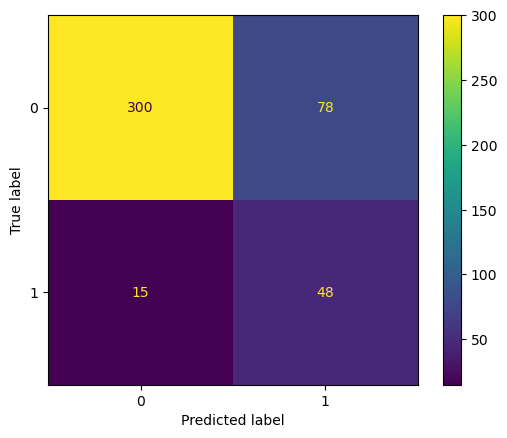

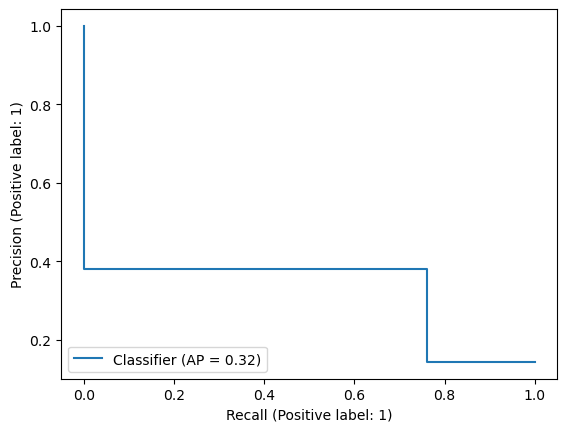

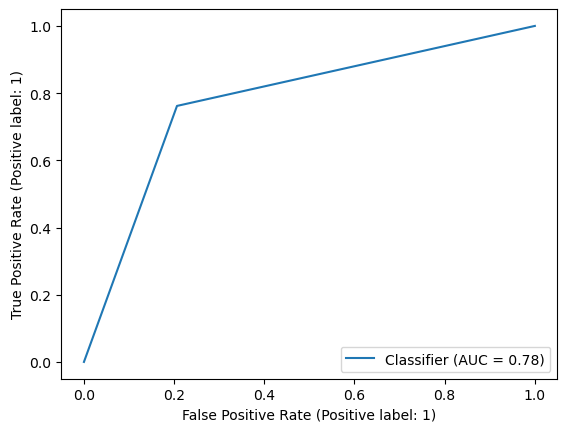

In [52]:
svm_best = SVC(**search6.best_params_, random_state=42,probability=True)
svm_best.fit(X_train, y_train)
y_hat = svm_best.predict(X_test)

save_output(y_test,y_hat,'SVM')
reports(y_test, y_hat)

#### Ensembles

In [53]:
models_final = [logistic_best,rf_best,cb_best,xgb_best,svm_best]

for i in range(2, len(models_final) + 1):
    models_combinations = list(combinations(models_final, i))

    for combination in models_combinations:
        unique_combination = {str(model) for model in combination}
        if len(set(unique_combination)) == len(combination):
            ensemble_models = [(f'Model{j+1}', model) for j, model in enumerate(combination)]
            ensemble = VotingClassifier(estimators=ensemble_models, voting='hard',n_jobs=-1)
            ensemble.fit(X_train, y_train)
            y_hat = ensemble.predict(X_test)
            save_output(y_test,y_hat,f'{[model.__class__.__name__ for _, model in ensemble_models]}')

#### Final results

The top-performing model is an ensemble of all models, achieving an 84% detection rate for potential positive responses with a 45% success rate.\
While there might be a slight decrease in production, it remains a commendable result for a task like marketing campaigns' output prediction.

In [54]:
models_sum = pd.DataFrame({'Model':models,
                          'F1_macro':f1_scores,
                          'ROC_AUC':roc_auc_scores,
                          'precision_macro':precision_scores,
                          'recall_macro':recall_scores})
models_sum.sort_values(by='recall_macro',ascending=False,inplace=True)
models_sum.reset_index(drop=True,inplace=True)
models_sum

,Model,F1_macro,ROC_AUC,precision_macro,recall_macro
0,"['LogisticRegression', 'RandomForestClassifier...",0.737,0.833,0.707,0.833
1,"['LogisticRegression', 'XGBClassifier', 'SVC']",0.727,0.828,0.700,0.828
2,"['CatBoostClassifier', 'XGBClassifier', 'SVC']",0.747,0.823,0.716,0.823
3,"['LogisticRegression', 'RandomForestClassifier...",0.735,0.821,0.705,0.821
4,"['LogisticRegression', 'CatBoostClassifier', '...",0.742,0.820,0.712,0.820
5,"['RandomForestClassifier', 'CatBoostClassifier...",0.718,0.817,0.692,0.817
6,"['LogisticRegression', 'RandomForestClassifier...",0.698,0.816,0.679,0.816
7,XGB,0.698,0.816,0.679,0.816
8,"['LogisticRegression', 'RandomForestClassifier...",0.716,0.816,0.691,0.816
9,"['RandomForestClassifier', 'CatBoostClassifier...",0.753,0.815,0.723,0.815



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       378
           1       0.45      0.84      0.58        63

    accuracy                           0.83       441
   macro avg       0.71      0.83      0.74       441
weighted avg       0.89      0.83      0.85       441



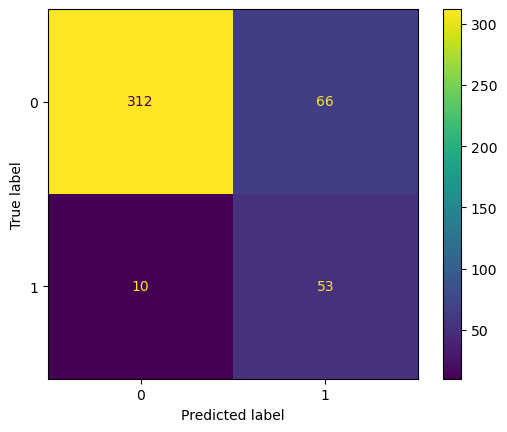

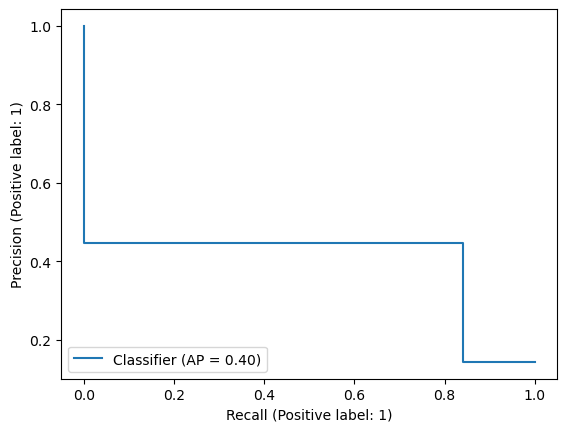

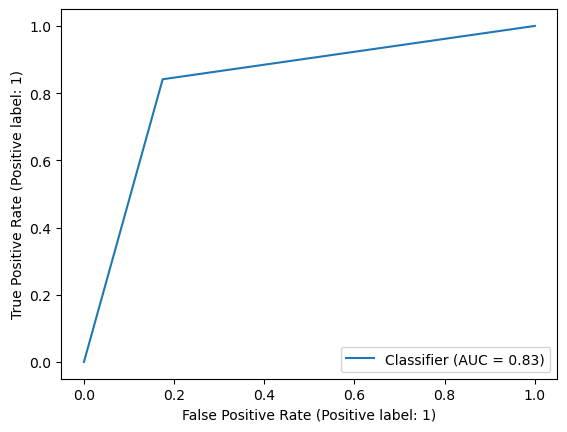

In [55]:
classifiers = [('logistic',logistic_best), ('rf',rf_best), ('cb',cb_best), ('xgb',xgb_best), ('svm',svm_best)]
ensemble = VotingClassifier(estimators=classifiers, voting='hard', n_jobs=-1)
ensemble.fit(X_train, y_train)
y_hat = ensemble.predict(X_test)
reports(y_test, y_hat)

### Clustering

In [56]:
def clustering_birch(X):
    cluster_range = range(2,20)
    silhouette_scores = []
    
    for n_clusters in cluster_range:
        birch = Birch(n_clusters=n_clusters)
        birch.fit(X)
        score = silhouette_score(X,birch.predict(X))
        score_dict = {
                    'Model':'Birch',
                    'N_clusters':n_clusters,
                    'Silhouette_score':score
                }
        silhouette_scores.append(score_dict)
    silhouette_scores = pd.DataFrame(silhouette_scores).sort_values(by='Silhouette_score',ascending=False)    
    
    return silhouette_scores

In [57]:
def clustering_kmeans(X):
    cluster_range = range(2,20)
    silhouette_scores = []
    
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X,kmeans.predict(X))
        score_dict = {
                    'Model':'KMeans',
                    'N_clusters':n_clusters,
                    'Silhouette_score':score
                }
        silhouette_scores.append(score_dict)
    silhouette_scores = pd.DataFrame(silhouette_scores).sort_values(by='Silhouette_score',ascending=False)    
    
    return silhouette_scores

In [58]:
def clustering_dbscan(X):
    metrics = ['euclidean','cosine','l2']
    eps = [.1,.5,1,2,5,10]
    min_samples = [5,10,20,30,50,100,200,500]
    silhouette_scores = []

    for metric in metrics:
        for e in eps:
            for s in min_samples:
                dbsc = DBSCAN(metric=metric,eps=e,min_samples=s,n_jobs=-1)
                dbsc.fit(X)
                labels = dbsc.labels_
                n_clusters = len(set(labels))-(1 if -1 in labels else 0)
                if n_clusters>1:
                    score = silhouette_score(X,labels,metric=metric,random_state=42)
                    score_dict = {
                        'Model':('DBSCAN',metric,e,s),
                        'N_clusters':n_clusters,
                        'Silhouette_score':score
                    }
                    silhouette_scores.append(score_dict)
    silhouette_scores = pd.DataFrame(silhouette_scores).sort_values(by='Silhouette_score',ascending=False)    
    
    return silhouette_scores

In [59]:
def clustering_ac(X):
    cluster_range = range(2,20)
    silhouette_scores = []
    
    for n_clusters in cluster_range:
        ac = AgglomerativeClustering(n_clusters=n_clusters)
        labels = ac.fit_predict(X)
        score = silhouette_score(X,labels)
        score_dict = {
                    'Model':'AggClust',
                    'N_clusters':n_clusters,
                    'Silhouette_score':score
                }
        silhouette_scores.append(score_dict)
    silhouette_scores = pd.DataFrame(silhouette_scores).sort_values(by='Silhouette_score',ascending=False)    
    
    return silhouette_scores

In [60]:
def clustering(df,features):
    X = df[features]
    X = StandardScaler().fit_transform(X)
    
    temp1 = clustering_birch(X)
    temp2 = clustering_kmeans(X)
    temp3 = clustering_dbscan(X)
    temp4 = clustering_ac(X)
    
    temp = pd.concat([temp1,temp2,temp3,temp4],axis=0).sort_values(by='Silhouette_score',ascending=False).head(10)
    return temp

Unfortunately, clustering is not applicable due to the low values of the silhouette scores.\
This indicates that the clusters are not of high quality, which could mislead the store in its business decisions.\
The recommendaton here is to gather additional data to enable the detection of clusters or client segments, thereby enhancing the effectiveness of future campaigns.\
Another approach that could be explored is creating rankings based on the original features.\
However, since the objective of this work does not involve preparing a clustering model, this approach will not be employed.

In [61]:
features = ['MntWines','MntMeatProducts','NumCatalogPurchases','AcceptedCmpOverall','Customer_Days','Recency','Income','MntGoldProds','NumStorePurchases',\
'NumWebVisitsMonth','marital_alone','Teenhome','Age','education_PhD','education_2n Cycle']

silhouette_scores = clustering(df,features)
silhouette_scores

,Model,N_clusters,Silhouette_score
0,KMeans,2,0.232423
1,Birch,3,0.206639
1,AggClust,3,0.203526
0,Birch,2,0.201294
0,AggClust,2,0.198394
3,Birch,5,0.174735
2,Birch,4,0.171462
2,AggClust,4,0.166297
1,KMeans,3,0.164942
4,KMeans,6,0.139631


In [62]:
features = ['Age','Income', 'Dependants','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',\
'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','marital_incouple']

silhouette_scores = clustering(df,features)
silhouette_scores

,Model,N_clusters,Silhouette_score
18,"(DBSCAN, cosine, 0.5, 500)",2,0.364848
0,KMeans,2,0.331377
0,AggClust,2,0.329866
0,Birch,2,0.316544
14,"(DBSCAN, cosine, 0.1, 20)",2,0.279711
15,"(DBSCAN, cosine, 0.1, 30)",2,0.268087
1,KMeans,3,0.239510
16,"(DBSCAN, cosine, 0.1, 50)",2,0.236980
1,AggClust,3,0.220131
2,KMeans,4,0.209258


In [63]:
features = ['Age','Income', 'Dependants','NumDealsPurchases',
'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','marital_incouple']

silhouette_scores = clustering(df,features)
silhouette_scores

,Model,N_clusters,Silhouette_score
19,"(DBSCAN, cosine, 0.5, 500)",2,0.310912
0,KMeans,2,0.282217
0,Birch,2,0.259991
1,KMeans,3,0.255157
0,AggClust,2,0.228418
1,AggClust,3,0.216902
2,KMeans,4,0.215982
1,Birch,3,0.210638
17,KMeans,19,0.202365
3,KMeans,5,0.201918


In [64]:
features = ['Age','Income', 'Dependants','marital_incouple']

silhouette_scores = clustering(df,features)
silhouette_scores

,Model,N_clusters,Silhouette_score
11,KMeans,13,0.377438
12,KMeans,14,0.372679
10,KMeans,12,0.370743
16,KMeans,18,0.357596
9,KMeans,11,0.356961
8,KMeans,10,0.356333
15,AggClust,17,0.356223
16,AggClust,18,0.353756
7,KMeans,9,0.353695
12,AggClust,14,0.353258


## Conclussion and Recommendations

The primary objective of this analysis, creating a model for classifying clients interested in marketing campaigns, has been successfully achieved.\
Now, let's delve into the secondary objectives, which are interconnected.

**Firstly**, to enhance sales, the store can strategically promote wine alongside meat, given their frequent association in purchases.\
Conversely, supporting other products could involve combining wine or meat with complementary items, such as Wine + Sweets.

**Secondly**, targeting educated individuals with high incomes presents an opportunity to focus on luxury goods, particularly premium wines.

**Thirdly**, the analysis highlights that the best response rate was observed in the group of single individuals with no children. While this could be a lucrative segment, it's essential to consider potential limitations due to its narrower scope.

**Fourthly**, catalogs prove to be an effective channel for promoting products within the high-income group. Surprisingly, the website, despite being more frequently used by families, does not exhibit a strong correlation with sales.

**Lastly**, incorporating the recency of purchases into campaigns can be advantageous, particularly for retaining and supporting loyal customers.